In [ ]:
# Matplotlib Visualizations Examples 
# from https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
# from unknow

In [1]:
%matplotlib inline

# runing bash command
!pip3 install seaborn 2>&1 1>/dev/null

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# plt.style.use('seaborn-whitegrid')
# sns.set_style("white")
 

import datetime, sys
print('Matplotlib Version: ' + mpl.__version__)
print('SeaBorn Version: ' + sns.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version) 
print('Ran on ' + datetime.datetime.now().isoformat())

Matplotlib Version: 3.0.2
SeaBorn Version: 0.9.0
NumPy Version: 1.15.4
Python Version: 3.7.1 (default, Nov  6 2018, 18:49:54) 
[Clang 9.0.0 (clang-900.0.39.2)]
Ran on 2018-12-11T16:00:14.403344


# Basics

With *few* exception, all examples use the object-oriented interface via `plt.subplots()`. In general, there is full parity between `pyplot` and the object-oriented interface. My personal opinion is `plt.(...)` for quick-and-dirty and then use `ax.(...)` when I want more control.

## Basic Plot

With labels, etc. The code `exPlot` builds the basics with the set configurations

In [2]:
# presetup 

x = np.linspace(0,2*np.pi,10**3)
y = np.sin(x) + np.cos(x)


def exPlot(isTeX=False):
    fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=100,num=1)
    ax.plot(x,y,'-k')
    ax.set_xlabel(r'x label with math (ex: $x^2$)')
    if not isTeX:
        ax.set_ylabel(r'y label with non-math math (ex: $\mathregular{{x^2}}$)') # Doesn't work for LaTeX render
    

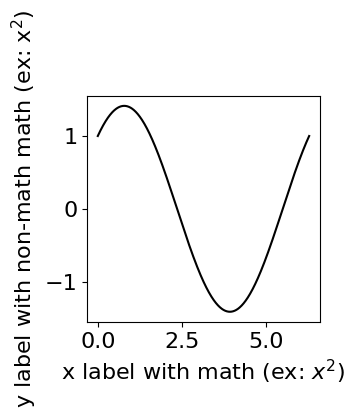

In [3]:
# These are the defaults

plt.rc('font', family='sans-serif') 
plt.rc('text', usetex=False)

exPlot()

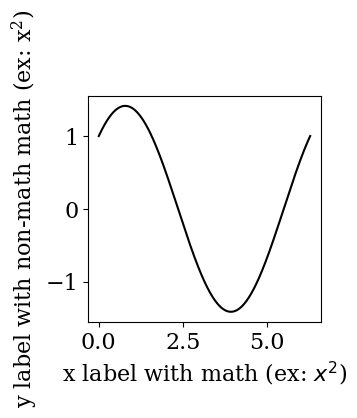

In [4]:
### Serif Only
plt.rc('font', family='serif')
exPlot()

In [6]:
plt.rc('font', family='sans-serif')
plt.rc('text', usetex=False)

## Scientific Notation

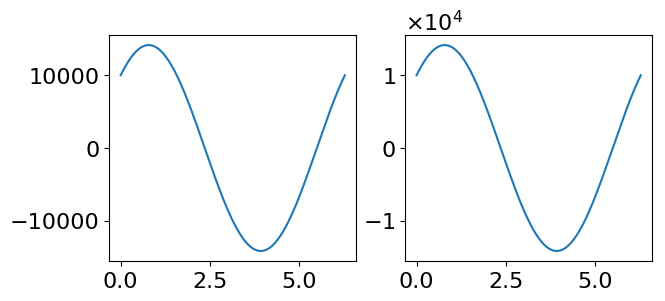

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1)

# Regular
ax1.plot(x,1e4*y)

# Scientific
ax2.plot(x,1e4*y)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))

ax2.yaxis.set_major_formatter(formatter)

## Standard Subplots


In [8]:
def subdemo(axes):
    for ii,ax in enumerate(axes.ravel()):
        ax.plot(x,10**(ii)*y,'-k')
    ax.yaxis.set_major_formatter(formatter) # Will always be the last one

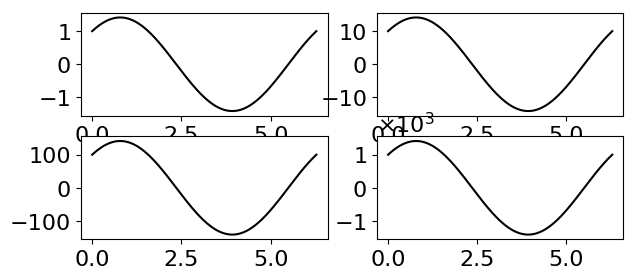

In [9]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
subdemo(axes)

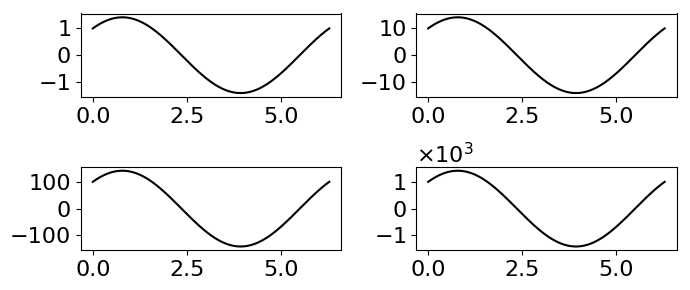

In [10]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
subdemo(axes)
fig.tight_layout()

### Manual

This example is not designed to look good. It is to show the results.

This comes from <http://stackoverflow.com/a/6541482>

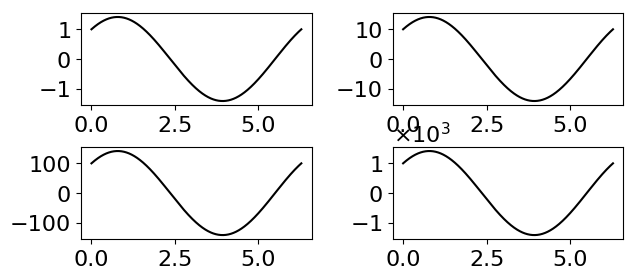

In [11]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
subdemo(axes)

fig.subplots_adjust(hspace=0.45,wspace=0.35)

## All Options w/ examples
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

### Shared Axes

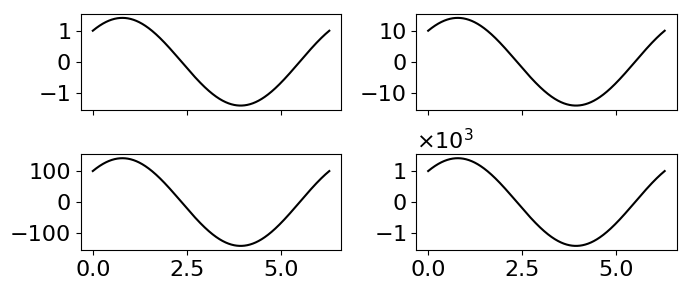

In [12]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True)
subdemo(axes)
fig.tight_layout()

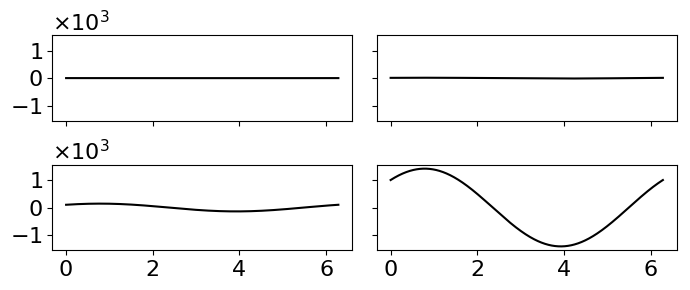

In [13]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True,sharey=True)
subdemo(axes)
fig.tight_layout()

## Fancy Subplots

There are a few ways to do this. 

* `gridspec` -- General purpose
* manually
* add subplots where you want -- doesn't have spans
    * Regular subplots and then "clear" axis

#### `gridspec`

Based on <http://matplotlib.org/users/gridspec.html>. You seem to have to rely on the `plt` tools to make all of the axes

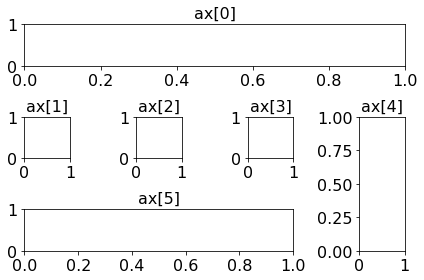

In [14]:
fig = plt.figure()

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)

ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)

ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title('ax[{}]'.format(ix))

fig.tight_layout()

### Manually

This example will be less complex to make life easier... In this case, you create the axes from the parent fig

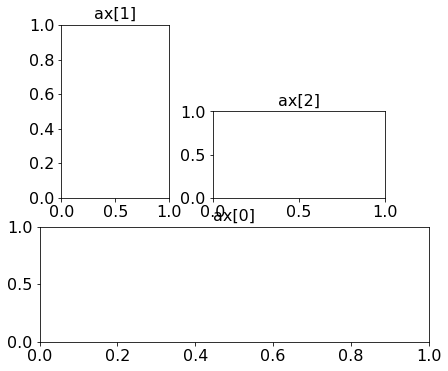

In [15]:
fig = plt.figure()

ax = [None for _ in range(3)]

ax[0] = fig.add_axes([0.1,0.1,0.9,0.4]) # Bottom
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6]) # They do not *need* to be in a grid
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    
# fig.tight_layout() # does not work with this method

#### Add subplots 

Can also do grids but harder (though not impossible) to do spanning

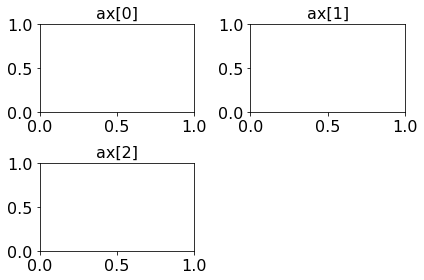

In [16]:
fig = plt.figure()

ax = [None for _ in range(3)]

ax[0] = fig.add_subplot(2,2,1)
ax[1] = fig.add_subplot(2,2,2)
ax[2] = fig.add_subplot(2,2,3)

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    
fig.tight_layout()

#### Regular plots with "cleared" axis

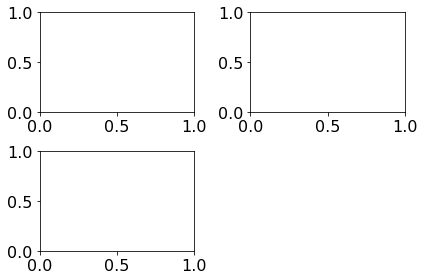

In [17]:
fig,axes = plt.subplots(2,2)
ax = axes[1,1]
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

### NoSpacing Demo

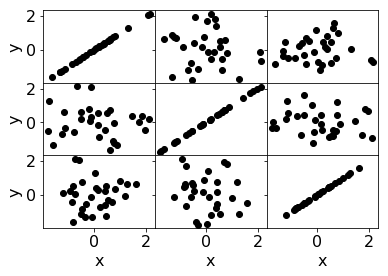

In [18]:
fig,axes = plt.subplots(3,3,sharex=True,sharey=True)

np.random.seed(282)
X = np.random.normal(size=(30,3))

import itertools
for ix,iy in itertools.product(range(3),range(3)):
    ax = axes[ix,iy]
    ax.plot(X[:,ix],X[:,iy],'ko')

for ax in axes[-1,:]:
    ax.set_xlabel('x')
for ax in axes[:,0]:
    ax.set_ylabel('y')

#fig.tight_layout(h_pad=0,w_pad=0)
fig.subplots_adjust(hspace=0,wspace=0)
        

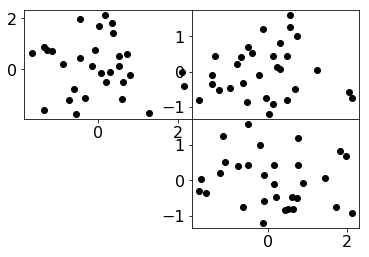

In [19]:
fig = plt.figure()

axes = []

np.random.seed(282)
X = np.random.normal(size=(30,3))

import itertools
for ii,(ix,iy) in enumerate(itertools.combinations([0,1,2],2)):
    ax = fig.add_subplot(2,2,2*ix+iy)
    ax.plot(X[:,ix],X[:,iy],'ko')
    axes.append(ax)


#fig.tight_layout(h_pad=0,w_pad=0)
fig.subplots_adjust(hspace=0,wspace=0)

## Pcolor(mesh) & Colorbar (and nice colormap)

Consider the following for making a nice `pcolor`-type plots with a colorbar. The colormaps are set with `cmap=plt.cm.Spectral_r` which is the nice one from ColorBrewer

### Setup & Defaults

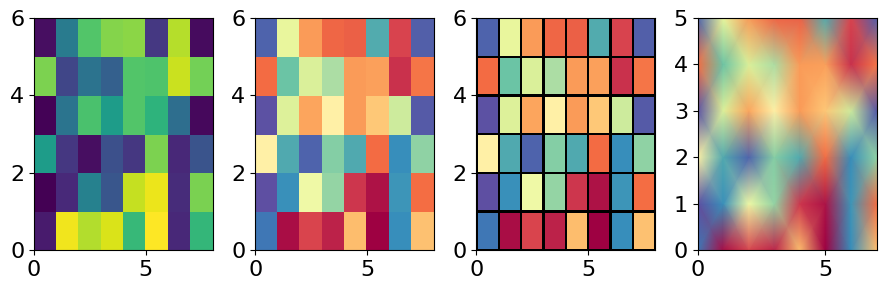

In [20]:
np.random.seed(362423)
A = np.random.uniform(size=(6,8))


fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(9,3),dpi=100)
def plotEX(ax,**kw):
    ax.pcolormesh(A,**kw)

plotEX(ax1)
plotEX(ax2,cmap=plt.cm.Spectral_r)
plotEX(ax3,cmap=plt.cm.Spectral_r,edgecolor='k')
plotEX(ax4,cmap=plt.cm.Spectral_r,shading='gouraud')
fig.tight_layout()

#### Standard colorbar

The size of the figure was selected to show the problem with scale

Also, since this invokes `fig`, it doesn’t play nice with subplots

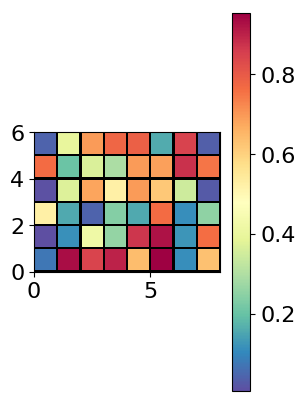

In [21]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')
fig.colorbar(pl)

#### Scaled Colorbar

This example scaled the colorbar. It also plays nicely with subplots (not demoed)

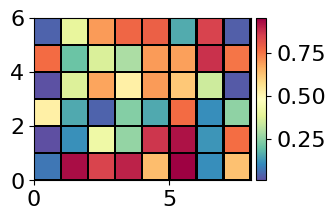

In [22]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)

### Set ranges

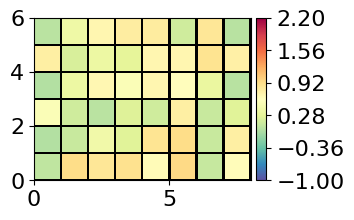

In [23]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k',vmin=-1,vmax=2.2)
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)
cbar.set_ticks(np.linspace(-1,2.2,6))

#### Dealing with `nan` -- DEPRECATED

This may be deprecated in Python 3 and/or later versions of matplotlib (not sure) but here is how to do it for this

(0.0, 8.0, 0.0, 6.0)

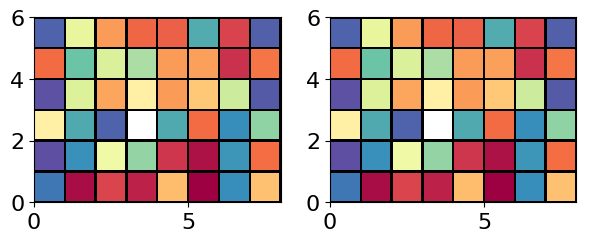

In [24]:
B = A.copy()
B[2,3] = np.nan

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,5),dpi=100)

ax1.pcolormesh(B,cmap = plt.cm.Spectral_r,edgecolor='k')
ax1.axis('image')

B = np.ma.masked_array(B,np.isnan(B))
ax2.pcolormesh(B,cmap = plt.cm.Spectral_r,edgecolor='k')
ax2.axis('image')

## Ticks

### Position

The following shows some examples of setting the tick locations


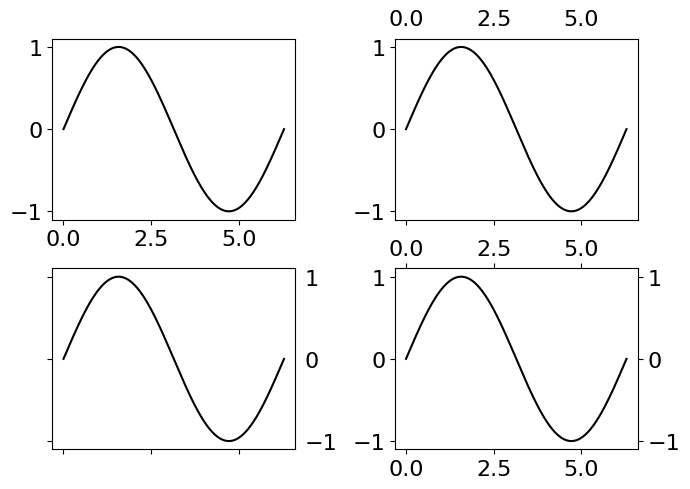

In [25]:
fig,axes = plt.subplots(2,2,figsize=(7,5),dpi=100)

X = np.linspace(0,2*np.pi,1000)
Y = np.sin(X)

for ax in axes.ravel(): #plot
    ax.plot(X,Y,'-k')

ax = axes[0,0]

ax = axes[0,1]
ax.tick_params(labeltop=True,labelbottom=False)

ax = axes[1,0]
ax.tick_params(labelright=True,labelbottom=False,labelleft=False)

ax = axes[1,1]
ax.tick_params(labeltop=True,labelbottom=True,labelright=True,labelleft=True)

# Also add ticks
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True)

fig.tight_layout()

#### All sides + inside

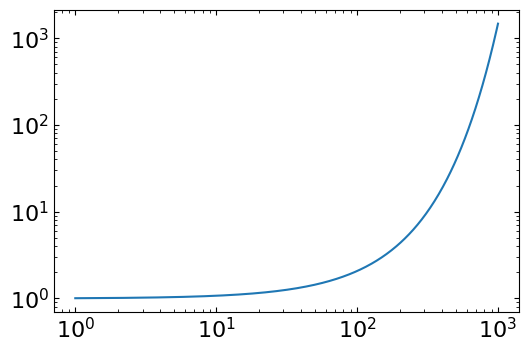

In [26]:
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)
fig,ax = plt.subplots(dpi=100)
ax.plot(x,y)
ax.set(xscale='log',yscale='log')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

#### Grids

Note that this is the same with and without a log scale but the log scale shows it better. The `zorder` makes sure the plot is in front of the grid lines

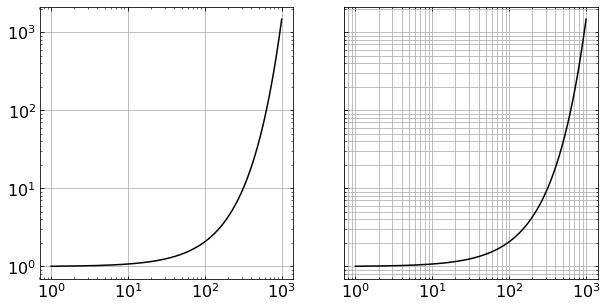

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)

for ax in (ax1,ax2):
    ax.plot(x,y,'-k')
    ax.set(xscale='log',yscale='log')
    ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',zorder=10)
ax1.grid(which='major')
ax2.grid(which='both')

### Labels

Rotated text and `ha` (horizontal alignment)

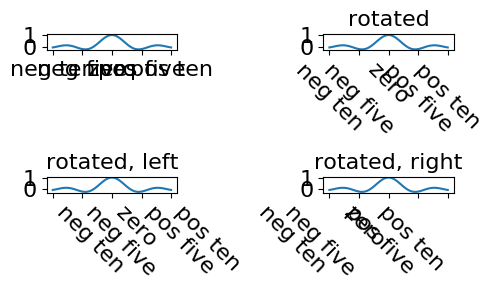

In [28]:
fig,axes = plt.subplots(2,2,figsize=(5,3),dpi=100)

x = np.linspace(-10,10,100)
y = np.sin(x)/(x + np.spacing(1))

labs = ['neg ten','neg five','zero','pos five','pos ten']

for ax in axes.ravel():
    ax.plot(x,y)
    ax.set_xticks([-10,-5,0,5,10])

axes[0,0].set_xticklabels(labs)

axes[0,1].set_xticklabels(labs,rotation=-45)
axes[0,1].set_title('rotated')

axes[1,0].set_xticklabels(labs,rotation=-45,ha='left')
axes[1,0].set_title('rotated, left')

axes[1,1].set_xticklabels(labs,rotation=-45,ha='right')
axes[1,1].set_title('rotated, right')


fig.tight_layout()

### Label Formats

Also included are prettier x-labels

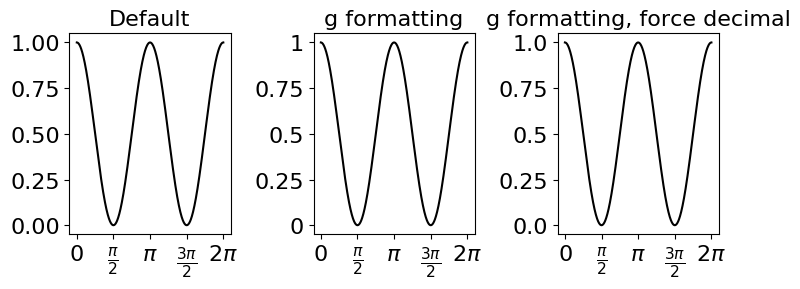

In [29]:
X = np.linspace(0,2*np.pi,1000)
Y = np.cos(X)**2

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,3),dpi=100,num=1)
for ax in (ax1,ax2,ax3):
    ax.plot(X,Y,'k-')
    ax.set_yticks([0, 0.25, 0.5,0.75,1])
    ax.set_xticks(np.linspace(0,2*np.pi,5))
    ax.set_xticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])

ax1.set_title('Default')

ax2.set_title('g formatting')
ax2.set_yticklabels( ['{:0.2g}'.format(l) for l in ax2.get_yticks()] )

ax3.set_title('g formatting, force decimal')
ax3.set_yticklabels( ['{:0.2g}'.format(l) if int(l)!=float(l) else '{:0.1f}'.format(l) 
                      for l in ax3.get_yticks()] )


fig.tight_layout()

## Legends

There are a few ways to work a legend. And there is a lot more that can be found on the web.

The main takeaway is to have `label=` in the respective plot

### Directly specify

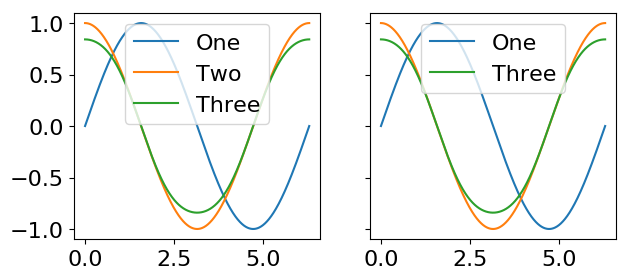

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

def plotEX(ax):
    pl = [None for i in range(3)]
    
    pl[0] = ax.plot(X,np.sin(X),label='One')
    pl[1] = ax.plot(X,np.cos(X),label='Two')
    pl[2] = ax.plot(X,np.sin(np.cos(X)),label='Three')
    return [p[0] for p in pl] # makes it just the objects
    
pl1 = plotEX(ax1) 
ax1.legend()

pl2 = plotEX(ax2) 
ax2.legend([pl2[0],pl2[2]],['One','Three'])

### Use `label`

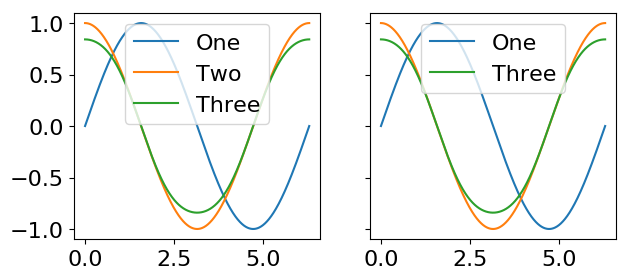

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

ax1.plot(X,np.sin(X),label='One')
ax1.plot(X,np.cos(X),label='Two')
ax1.plot(X,np.sin(np.cos(X)),label='Three')
ax1.legend()

ax2.plot(X,np.sin(X),label='One')
ax2.plot(X,np.cos(X)) # NO LABEL
ax2.plot(X,np.sin(np.cos(X)),label='Three')
ax2.legend()

### Number of points

Thankfully, the default was changed to one.

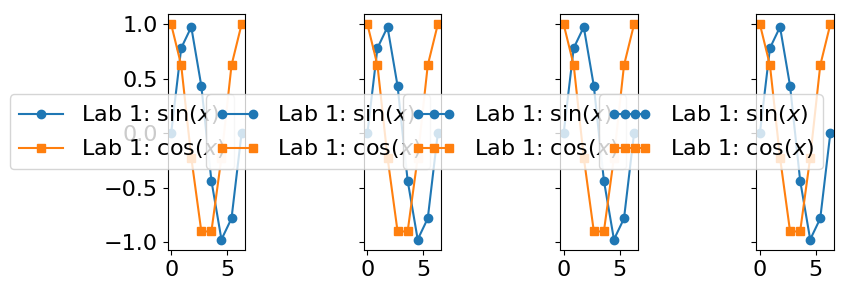

In [32]:
fig,axes = plt.subplots(1,4,figsize=(8,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,8)


for ii,ax in enumerate(axes):
    ax.plot(X,np.sin(X),'-o',label=r'Lab 1: $\sin(x)$')
    ax.plot(X,np.cos(X),'-s',label=r'Lab 1: $\cos(x)$')
    ax.legend(numpoints=(ii+1))
    
    
fig.tight_layout()

### Dummy Legends

This is useful if you want certain entries that are not to be plotted

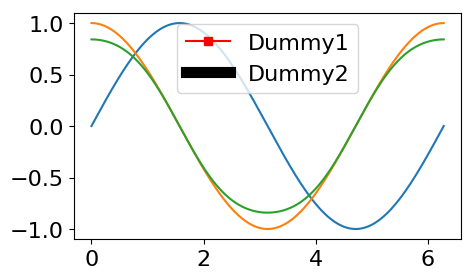

In [33]:
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

# Real Lines
ax.plot(X,np.sin(X),'-')
ax.plot(X,np.cos(X),'-')
ax.plot(X,np.sin(np.cos(X)),'-')

# Dummy lines
ax.plot([],'-rs',label='Dummy1')
ax.plot([],'k',label='Dummy2',LineWidth=8)
p = ax.legend()

### Legend in its own plot

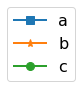

In [34]:
fig,ax = plt.subplots(1,1,figsize=(1,1))
ax.plot([],[],'-s',label='a',linewidth=2,ms=8)
ax.plot([],[],'-*',label='b',linewidth=2,ms=8)
ax.plot([],[],'-o',label='c',linewidth=2,ms=8)
ax.legend(loc='center',numpoints=1)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

## Multiple y-axes

The first example is mine. The second is taken *nearly* verbatim from <http://stackoverflow.com/a/7734614>

I will experiment a little with combining scientific notation as well as log scales but I won't go too crazy (until I have to do it at which point, I will update this)

### Double y-axis

**NOTE**: The keyword for `tick_params` is `colors` (with an **s**)

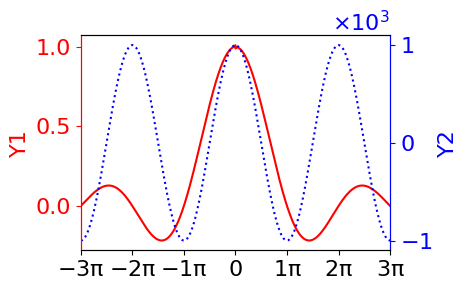

In [35]:
fig, ax1 = plt.subplots(1,1,figsize=(5,3),dpi=100)

X = np.linspace(-3*np.pi,3*np.pi,1000)
Y1 = np.sin(X)/(X+0.0001)
Y2 = 1e3 * np.cos(X)
Y3 =  np.exp(np.abs(X))

# Twin the axis
ax2 = ax1.twinx()

# Plotting
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,':b')

# Color the axis and add labels
ax1.set_ylabel('Y1',color='r')
ax2.set_ylabel('Y2',color='b')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

# Set the spine colors. Really only need to do ax2 since that is on top
# but this just makes 100% sure
for ax in (ax1,ax2):
    ax.spines['left'].set_color('r')
    ax.spines['right'].set_color('b')

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs) 

fig.tight_layout()

### Triple y-axis

Again, this is inspired by <http://stackoverflow.com/a/7734614> but I make a few changes

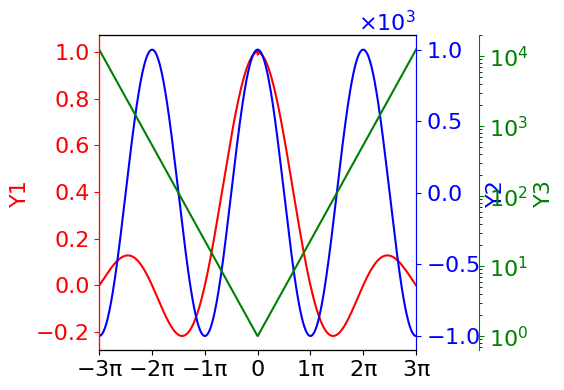

In [36]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4),dpi=100)

# Twin the x-axis twice to make independent y-axes.
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

# Plot
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,'-b')
ax3.plot(X,Y3,'-g')

colors = ['r','b','g']
axes = [ax1,ax2,ax3]
names = ['Y1','Y2','Y3']

for ax in (ax1,ax2,ax3):
    ax.spines['left'].set_color(colors[0])
    ax.spines['right'].set_color(colors[1])
ax3.spines['right'].set_color('g') # reset
    
for ax,color,name in zip(axes,colors,names):
    ax.set_ylabel(name,color=color)
    ax.tick_params(axis='y', colors=color)

# Nicer ax2 y axis
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Set ax3 to log
ax3.set_yscale('log')

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs)

fig.tight_layout()

## 3D Data

In [37]:
X1,X2 = np.meshgrid(*[np.linspace(-1,1,100)]*2)
F = (1.0 + (1.0/3.0)/(2.0 * X1 + X2 + 7.0/2.0) ) * np.exp(- (0.5 * (X2-1.0/5.0) * (X1 + 1.0))**2)

def _set_axis(ax,z=True):
    r =0.01
    if z:
        ax.set_zlim([0.25, 1.67])
    ax.set_xlim([-1-2*r, 1+2*r])
    ax.set_ylim([-1-2*r, 1+2*r])
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    ax.set_aspect('equal')

### Countour


`contourf` does *not* include the lines so it is helpful to set them yourself.


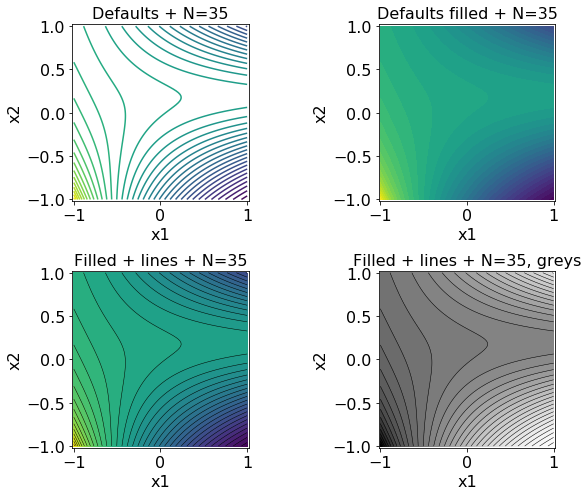

In [38]:
fig,axes = plt.subplots(2,2,figsize=(9,7))

axes[0,0].contour(X1,X2,F,35)
axes[0,0].set_title('Defaults + N=35')

axes[0,1].contourf(X1,X2,F,35)
axes[0,1].set_title('Defaults filled + N=35')

axes[1,0].contourf(X1,X2,F,35)
axes[1,0].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,0].set_title('Filled + lines + N=35')

axes[1,1].contourf(X1,X2,F,35,cmap=plt.cm.Greys)
axes[1,1].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,1].set_title('Filled + lines + N=35, greys')

for ax in axes.ravel():
    _set_axis(ax,z=False)

fig.tight_layout()

#### Colorbar

Same as above

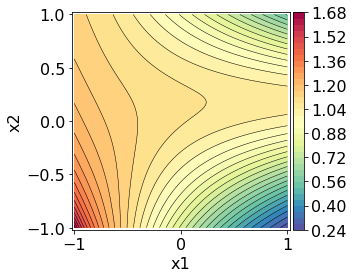

In [39]:
fig,ax = plt.subplots()
obj = ax.contourf(X1,X2,F,35,cmap=plt.cm.Spectral_r)
ax.contour(X1,X2,F,35,colors='k',linewidths =0.5 )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(obj,cax=cax)

_set_axis(ax,z=False)

### Surface Plots

Unlike Matlab, there is nothing wrong with setting your grid with a lot of points. You then use `cstride` and `rstride` to control that. In this example, I set with 100 points but use `cstride=4` to only plot a line every 4 spaces and `rstride=3` to plot a line every 3 in the other direction

Must include the following to import `Axes3D`

In [40]:
from mpl_toolkits.mplot3d import Axes3D

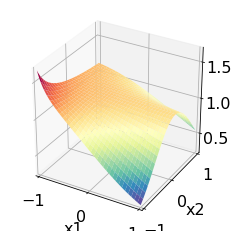

In [41]:
# default 

fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r)
_set_axis(ax)

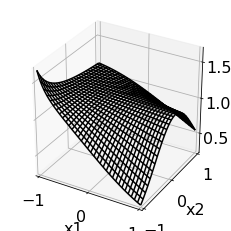

In [42]:
# Wiremesh
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)

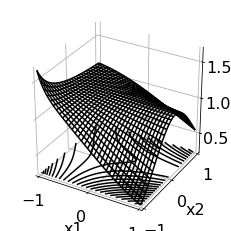

In [43]:
# Wiremesh + contour + white panes

fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')

# White edges
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
CS = ax.contour(X1,X2,F,25,zdir='z',offset=0.25, colors='k')
_set_axis(ax)

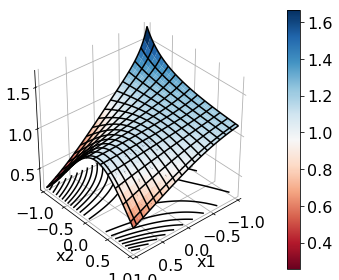

In [44]:
# All together + rotation + colorbar

cmap=plt.cm.RdBu
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=cmap)
SF = ax.plot_wireframe(X1,X2,F,rstride=8,cstride=6,color='k')
CS = ax.contour(X1,X2,F,25,zdir='z',offset=0.25, colors='k')

# Colorbar
m = plt.cm.ScalarMappable(cmap=cmap)
m.set_array(F)
fig.colorbar(m)

# Rotate
ax.view_init(35,49)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

_set_axis(ax)
fig.tight_layout()

#### Interactive

This shows how to do the plots interactive by changing 

    %matplotlib inline
   
to

    %matplotlib qt

But it is to be commented out in the main one.

It may need to be run twice...

```python
%matplotlib qt
#%matplotlib inline
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)
```

## Patches & hatches

This discussion is largly taken from <http://matthiaseisen.com/pp/patterns/p0203/>

### Simple patch object

(again, see link above)

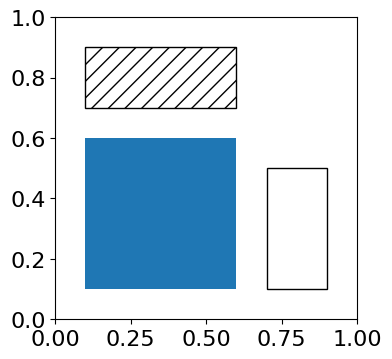

In [45]:
fig,ax = plt.subplots(1,1,figsize=(1.62*4,4),dpi=100,num=1)
ax.add_patch(
    mpl.patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
    )
)
ax.add_patch(
    mpl.patches.Rectangle((0.7,0.1),0.2,0.4,fill=False)
    )
ax.add_patch(
    mpl.patches.Rectangle((0.1,0.7),0.5,0.2,fill=False,hatch='//')
    )
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')

### Hatch Demos

Below are many types of hatches. From the [documentation](http://matplotlib.org/api/collections_api.html#matplotlib.collections.Collection.set_hatch) only notes:

```
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
```

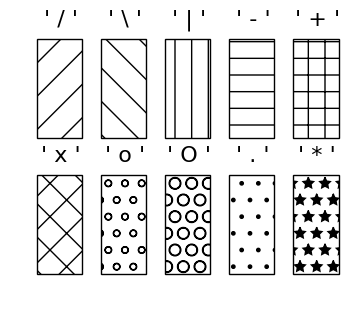

In [46]:
hatches = ['/','\\','|','-','+','x','o','O','.','*']
fig,axes = plt.subplots(2,5,figsize=(4,3.3),dpi=100,num=1)

def plotHatch(ax,hatch):
    ax.add_patch(mpl.patches.Rectangle((0.05,0.05),0.85,1.85,fill=False,hatch=hatch))
    ax.set_xlim((0,1))
    ax.set_ylim((0,2))
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(r"' {:s} '".format(hatch))

for hatch,ax in zip(hatches,axes.ravel()):
    plotHatch(ax,hatch)

#### Double, Triple, etc

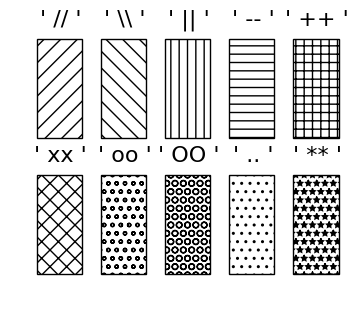

In [47]:
fig,axes = plt.subplots(2,5,figsize=(4,3.3),dpi=100,num=1)
for hatch,ax in zip(hatches,axes.ravel()):
    plotHatch(ax,hatch*2)

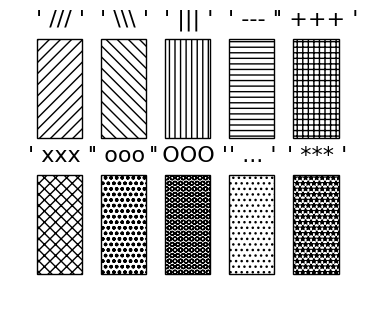

In [48]:
fig,axes = plt.subplots(2,5,figsize=(4,3.3),dpi=100,num=1)
for hatch,ax in zip(hatches,axes.ravel()):
    plotHatch(ax,hatch*3)

### Hatch filled plots

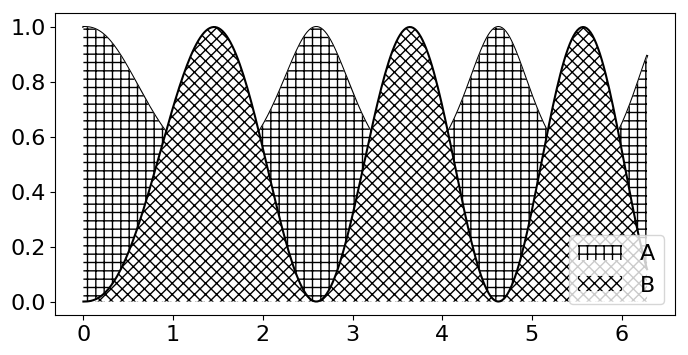

In [49]:
fig,ax = plt.subplots(1,1,figsize=(8,4),dpi=100)
X = np.linspace(0,2*np.pi,300)
Y = np.sin(X**1.2)**2

ax.plot(X,1.0/(Y+1),'-k',zorder=-10) # Set behind by using zorder
ax.plot(X,Y,'-k',zorder=2)

ax.fill_between(X,1.0/(Y+1),hatch='++',facecolor='w',label='A')
ax.fill_between(X,Y,hatch='xxx',facecolor='w',label='B')
ax.legend()

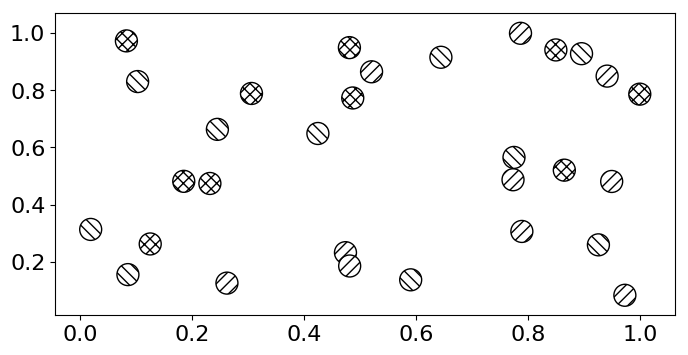

In [50]:
fig,ax = plt.subplots(1,1,figsize=(8,4),dpi=100)
np.random.seed(28832)
X = np.random.uniform(size=(10,4))
ax.scatter(X[:,0],X[:,1],s=250,color='w',edgecolors='k',hatch='xxx')

ax.scatter(X[:,1],X[:,0],s=250,color='w',edgecolors='k',hatch='///')
ax.scatter(X[:,2],X[:,3],s=250,color='w',edgecolors='k',hatch='\\\\\\')

## Inset Plots, Etc

There are many ways to do inset plots. I will demo a few here

### Built In Tools

The following demos using a built in tool: `mpl_toolkits.axes_grid1.inset_locator.inset_axes`

The whole thing is not well documented, but I followed the inheretance up to `mpl_toolkits.axes_grid1.inset_locator.AnchoredOffsetbox`. From that, I got the following location guides:

    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10,
    
See [AxesGrid toolkit Overview](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#insetlocator)

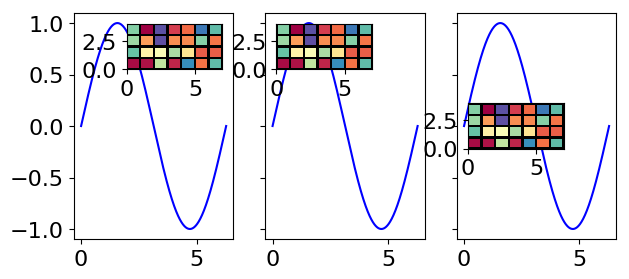

In [51]:
from mpl_toolkits.axes_grid1 import inset_locator
X = np.linspace(0,2*np.pi,1000)
np.random.seed(47344)
A = np.random.uniform(size=(4,7))

fig,axes = plt.subplots(1,3,figsize=(7,3),dpi=100,sharey=True)

locs = [1,2,6]

ax_minis = []
for ax,loc in zip(axes,locs): 
    ax.plot(X,np.sin(X),'-b')
    
    ax_mini = inset_locator.inset_axes(ax,width='60%',height='20%',loc=loc)
    
    ax_mini.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
    ax_minis.append(ax_mini) # Smart to save it 

# The following will fail with this
# fig.tight_layout()

## Fancy Boxes

These come directly from <http://stackoverflow.com/a/17087794>

> The last two are "Fancy" bbox patches, so the padding, etc is set in a different manner. (Which is rather annoying for simple things like padding, though it makes the implementation simpler behind-the-scenes.)

Text(0.5, 0.2, 'Test')

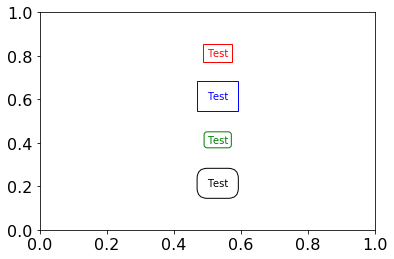

In [52]:
fig, ax = plt.subplots()

ax.text(0.5, 0.8, 'Test', color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))
ax.text(0.5, 0.6, 'Test', color='blue', 
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))
ax.text(0.5, 0.4, 'Test', color='green', 
        bbox=dict(facecolor='none', edgecolor='green', 
                  boxstyle='round'))
ax.text(0.5, 0.2, 'Test', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', 
                  boxstyle='round,pad=1'))

## Contours of scattered Data

Two ways to contour scattered data

Text(0.5, 1.0, 'tricontourf')

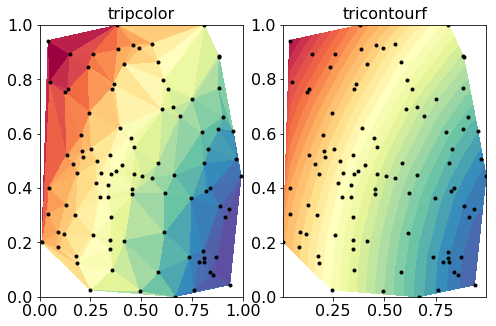

In [53]:
np.random.seed(1002)
N = 100
X = np.random.uniform(size=N)
Y = np.random.uniform(size=N)

Z = np.sin(X) + np.cos(Y)

fig,axes = plt.subplots(1,2,figsize=(8,5))

cmap = plt.cm.Spectral

ax = axes[0]
ax.tripcolor(X,Y,Z,cmap=cmap)
ax.plot(X,Y,'.k')
ax.set_title('tripcolor')
ax.set_xlim([0,1]); ax.set_ylim([0,1])

ax = axes[1]
ax.tricontourf(X,Y,Z,30,cmap=cmap)
ax.plot(X,Y,'.k')
ax.set_title('tricontourf')


### Filled 

Presented below are two different ways to do this. The first is **better** but I show the other as well. The first way doesn't require as much fiddling with the inputs and will handle expansion better.

Notice there is a non-linear scaling

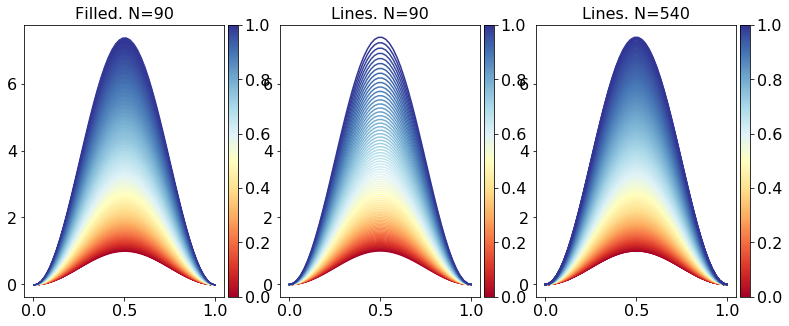

In [54]:
cmap = plt.cm.RdYlBu

X = np.linspace(0,1,50)
fun = lambda n: (np.exp(2*n))*0.5*(1-np.cos(X*2*np.pi))

fig,axes = plt.subplots(1,3,figsize=(13,5))

########### Fake a color bar
pcf = axes[2].pcolormesh([[0,1],[1,0]],cmap=cmap,vmin=0,vmax=1)
axes[2].clear()


############################### Better way
N = 90
ax = axes[0]
for ii in range(N-1):
    n0 = 1.0*ii/(N-1)
    n1 = 1.0*(ii+1)/(N-1)
    nc = 1.0*ii/(N-2) # color SHould be in [0,1]
    
    ax.fill_between(X,fun(n0),fun(n1),color=cmap(nc))

    ax.set_title('Filled. N={}'.format(N))
    
############################### Alternative. Have to be careful about spacing
for ax,N2 in zip(axes[1:],[N,6*N]):
    for ii in range(N2):
        n = 1.0*ii/(N2-1)
        ax.plot(X,fun(n),'-',color=cmap(n))
        ax.set_title('Lines. N={}'.format(N2))
#fig.colorbar(pcf)
############################ Colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
for ax in axes:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(pcf,cax=cax)

# Styles

You can also use some of the built-in styles.

In [56]:
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update(inline_rc)

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [57]:
# Spliting data 
X = np.linspace(0,2*np.pi,100)
Y1 = np.sin(X)
Y2 = np.sin(X**2)

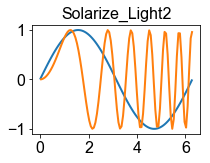

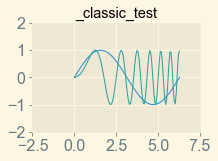

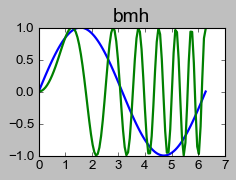

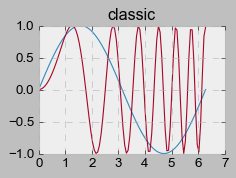

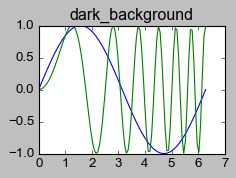

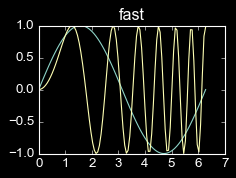

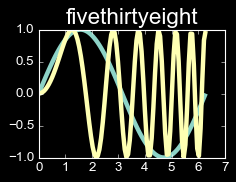

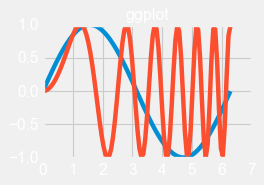

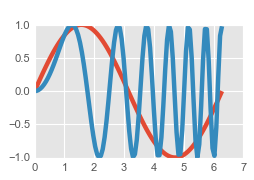

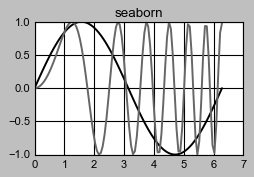

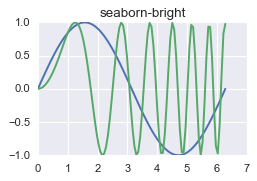

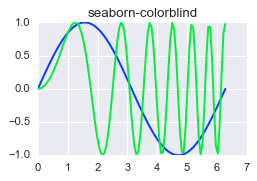

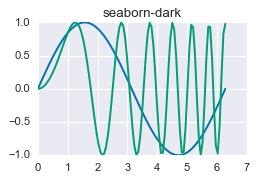

In [58]:
# part 1
for ii,style in enumerate(sorted(plt.style.available)[:len(plt.style.available)//2]):
    fig,ax = plt.subplots(figsize=(3,2),num=ii)
    plt.style.use(style)
    ax.plot(X,Y1,label='Y1')
    ax.plot(X,Y2,label='Y2')
    ax.set_title(style)


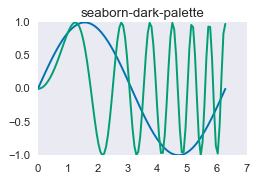

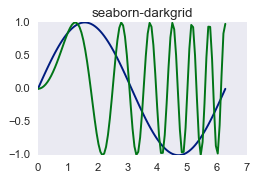

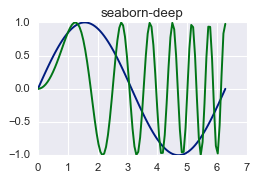

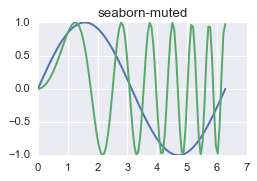

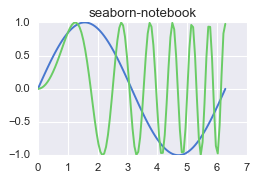

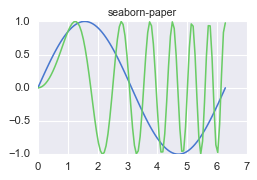

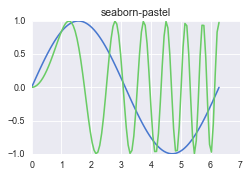

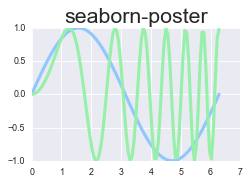

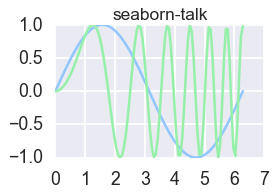

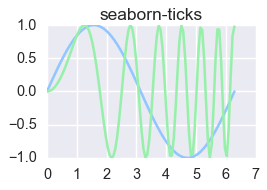

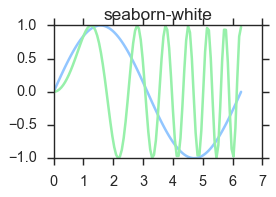

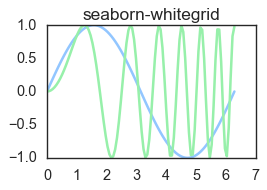

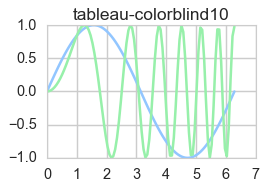

In [59]:
# part 2
for ii,style in enumerate(sorted(plt.style.available)[len(plt.style.available)//2:]):
    fig,ax = plt.subplots(figsize=(3,2),num=ii)
    plt.style.use(style)
    ax.plot(X,Y1,label='Y1')
    ax.plot(X,Y2,label='Y2')
    ax.set_title(style)

In [ ]:
plt.style.use('default')
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update(inline_rc)

## Export Issues

By default, Jupyter exports images as `png`. In addition, at least with Chrome, only `png` can be viewed

Below is the command to export as PDF as well. However, markdown export tends to break (doesn't show images) when you do both exports. See workaround below

```python
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')  # Exports both png and pdf. See below for issues
set_matplotlib_formats('png') # Just pngs. Good for development
```

### Markdown Export Workaround

As noted above, markdown export images do not work with the PDF option (though PDF export does work). The workaround is as follows:

1. Include the above code block, run the code, export as markdown
1. Remove the above code (or just have `set_matplotlib_formats('png')`), run the code, export to markdown
1. Find/Replace `png)` with `pdf)` and copy the corresponding pdf files into that directory

----

# Scatter plot

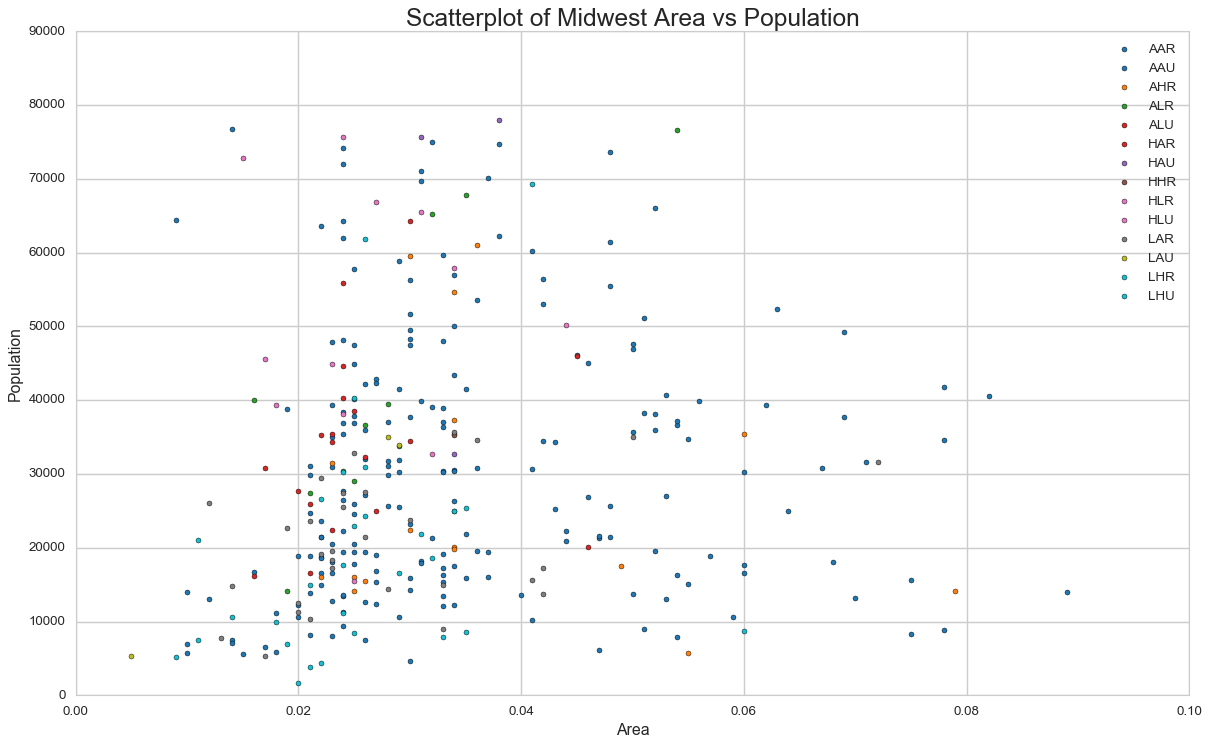

In [60]:
# Import dataset 
midwest = pd.read_csv("data/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=[colors[i]], label=str(category))
    
# matplotlib3 have small problem about colors
# https://stackoverflow.com/questions/52876985/matplotlib-warning-using-pandas-dataframe-plot-scatter
    
    
# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

---

# Bubble plot with Encircling

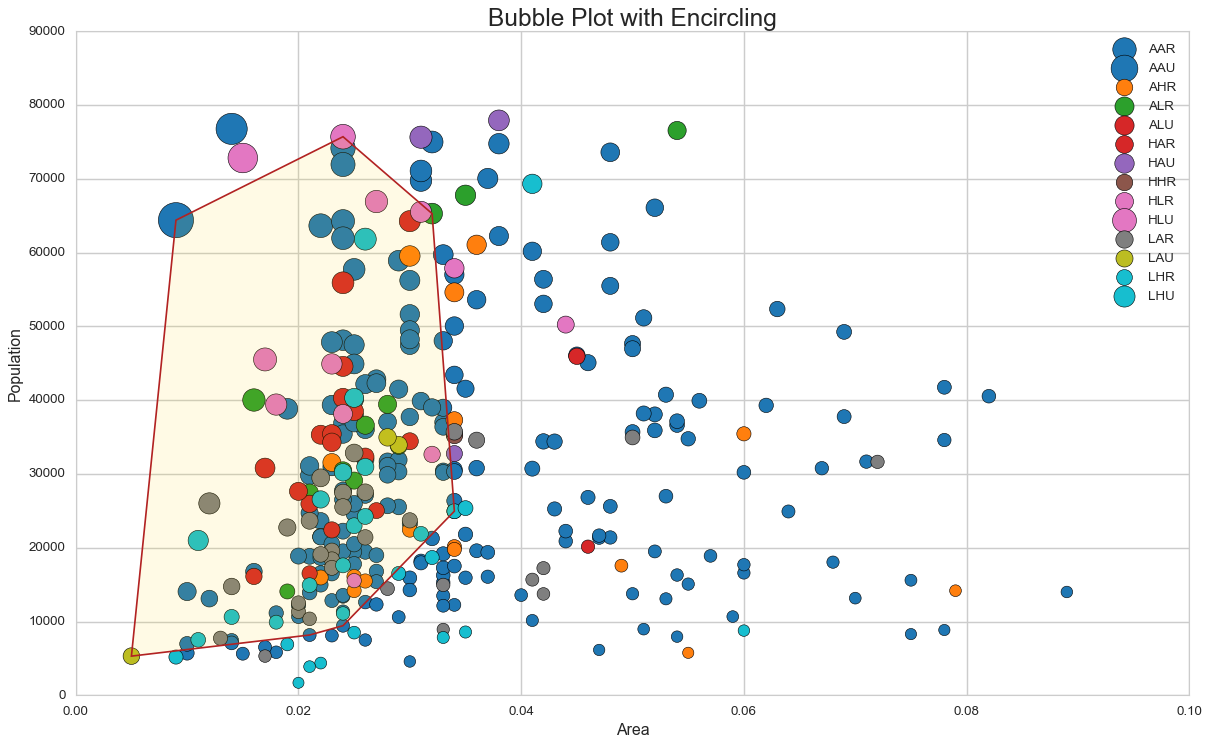

In [61]:
from scipy.spatial import ConvexHull

# Step 1: Prepare Data
midwest = pd.read_csv("data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=[colors[i]], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

----

# Scatter plot with linear regression line of best fit

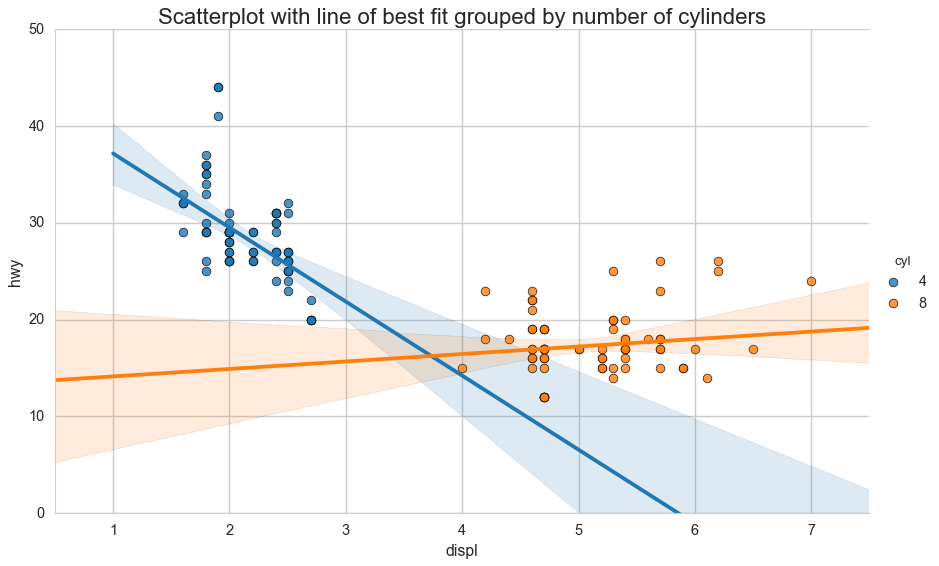

In [64]:
!pip3 install statsmodels 2>&1 1>/dev/null

# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
# sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

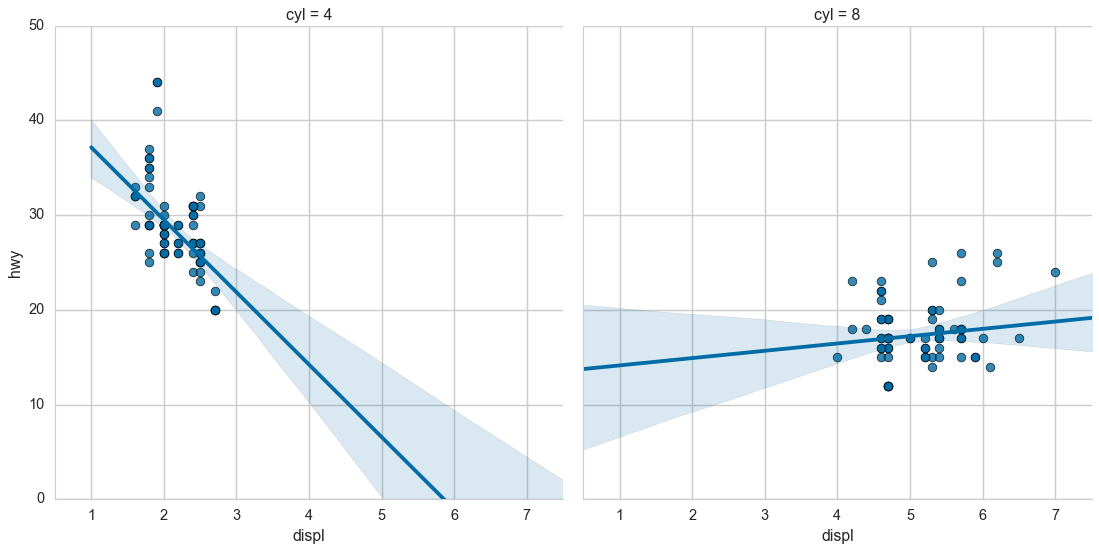

In [63]:
# Each regression line in its own column

# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
# sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

# Jittering with stripplot

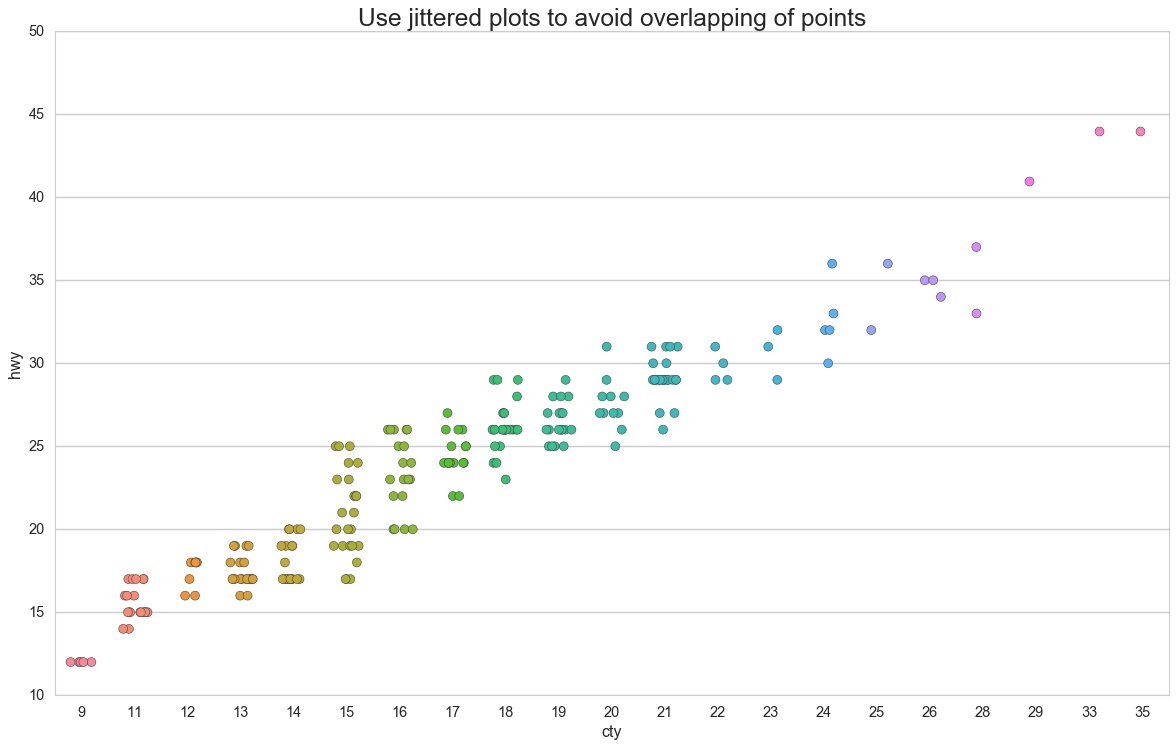

In [65]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()


# Counts Plot

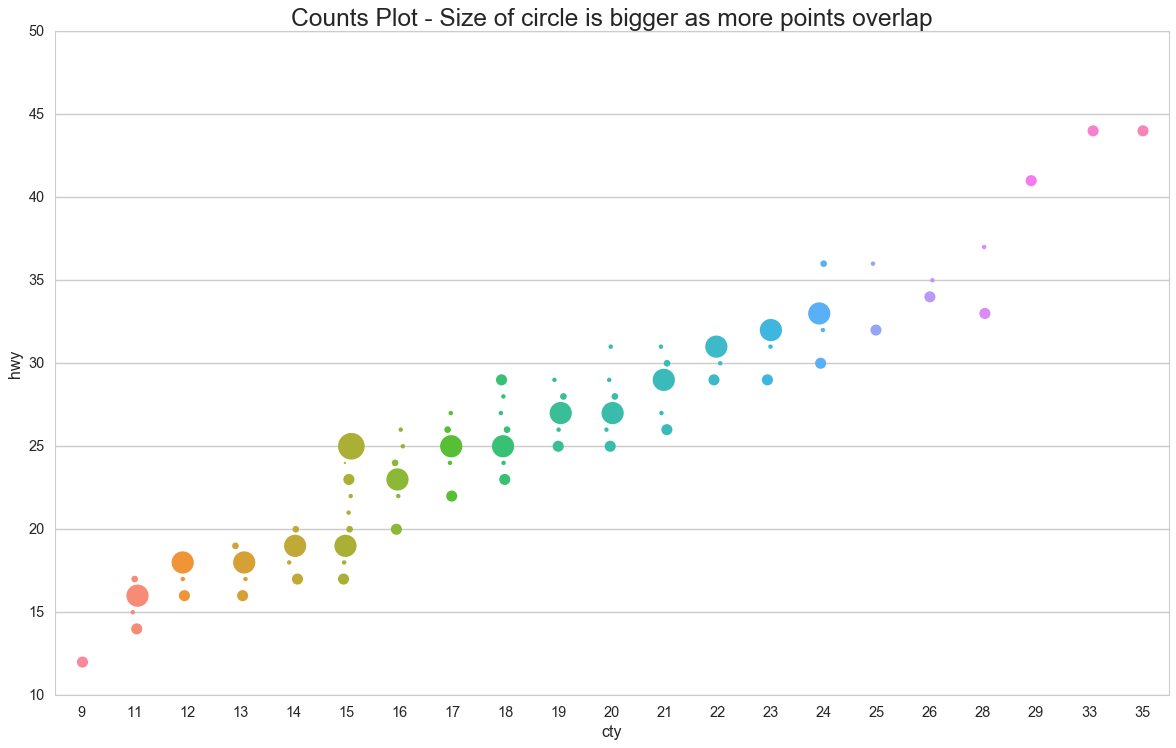

In [66]:
df = pd.read_csv("data/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

# Marginal Histogram

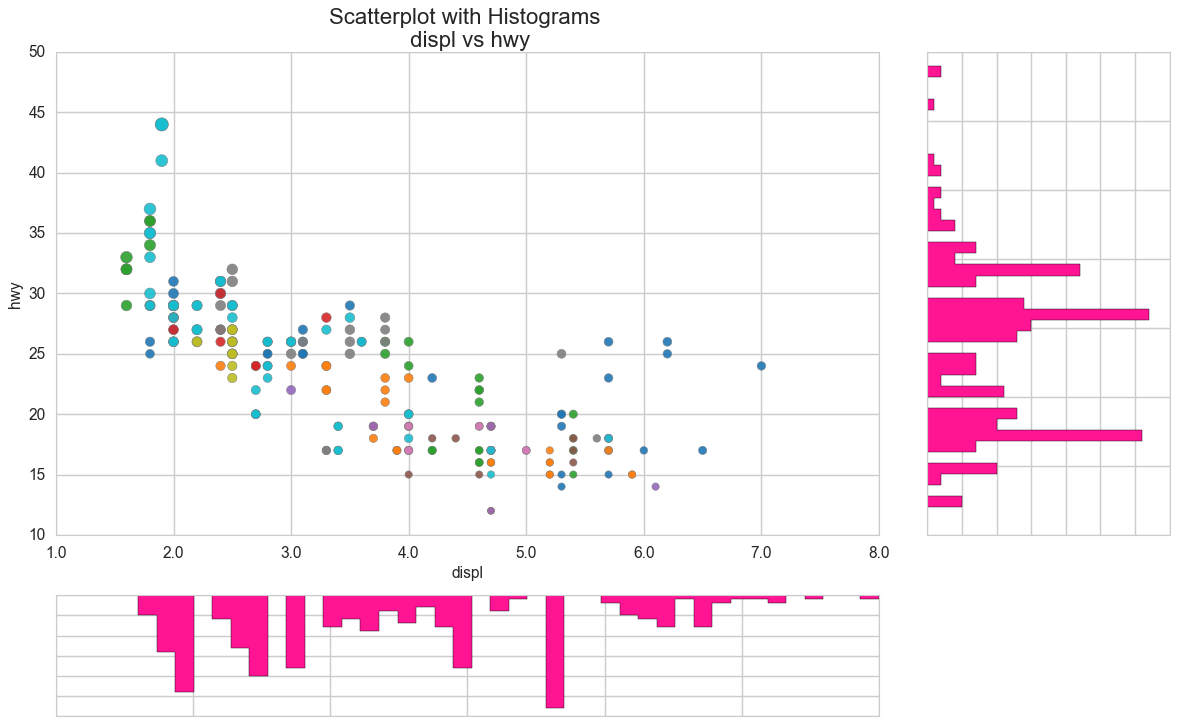

In [67]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

# Marginal Boxplot

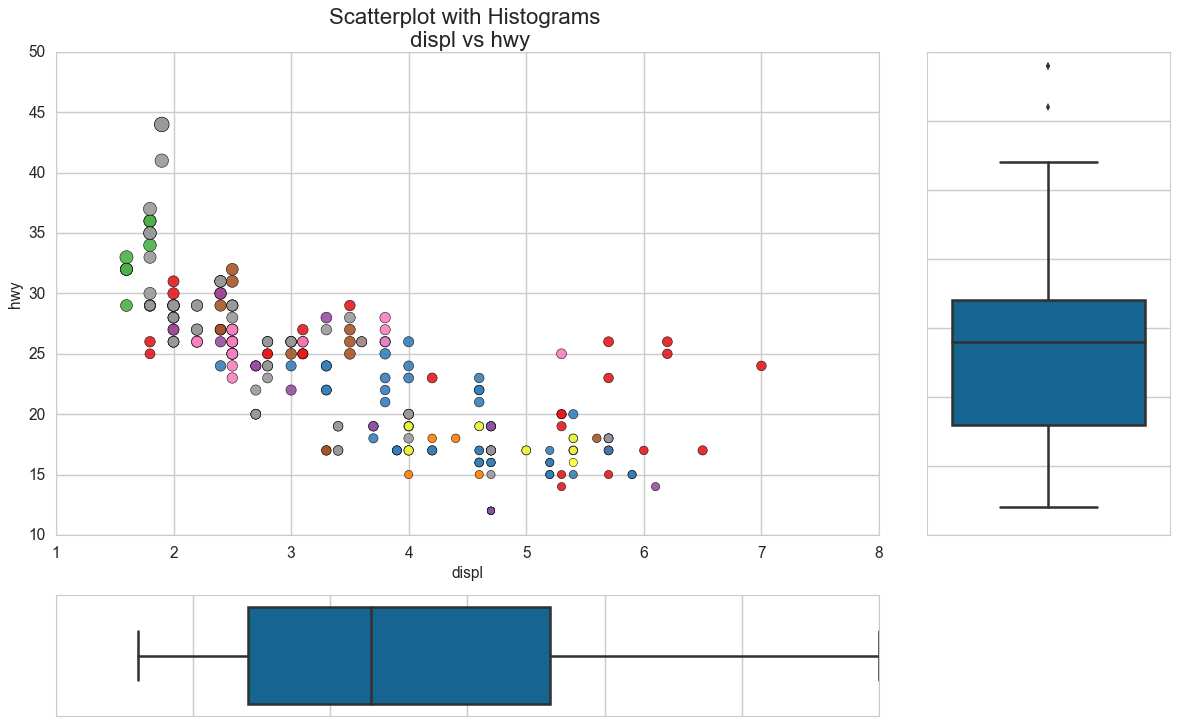

In [68]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

# Correllogram

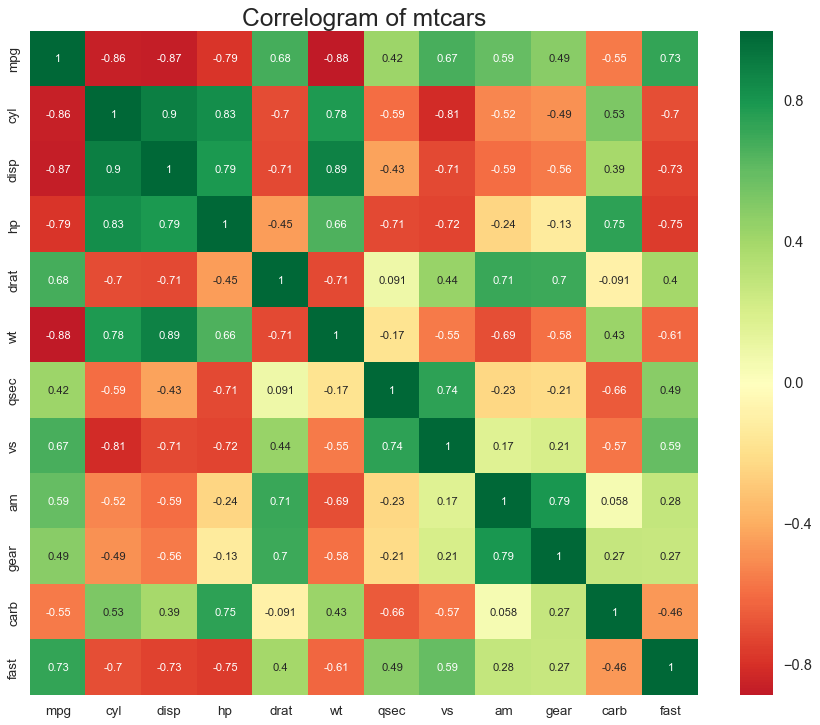

In [69]:
# Import Dataset
df = pd.read_csv("data/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Pairwise Plot

<Figure size 800x640 with 0 Axes>

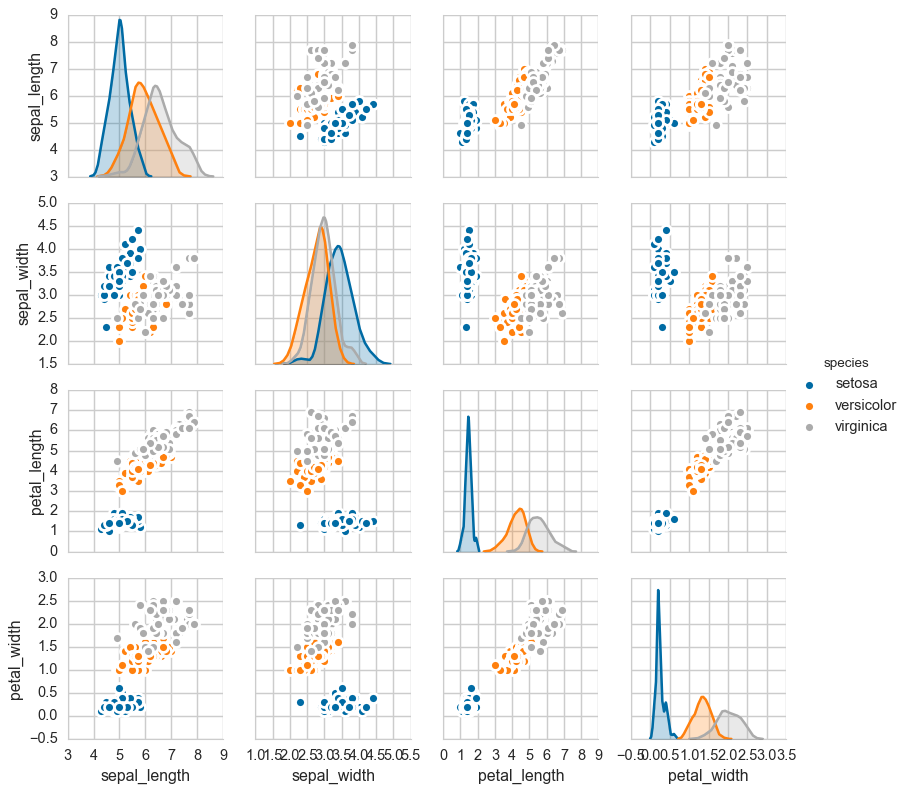

In [70]:
# Load Dataset
df = pd.read_csv("data/iris.csv")

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

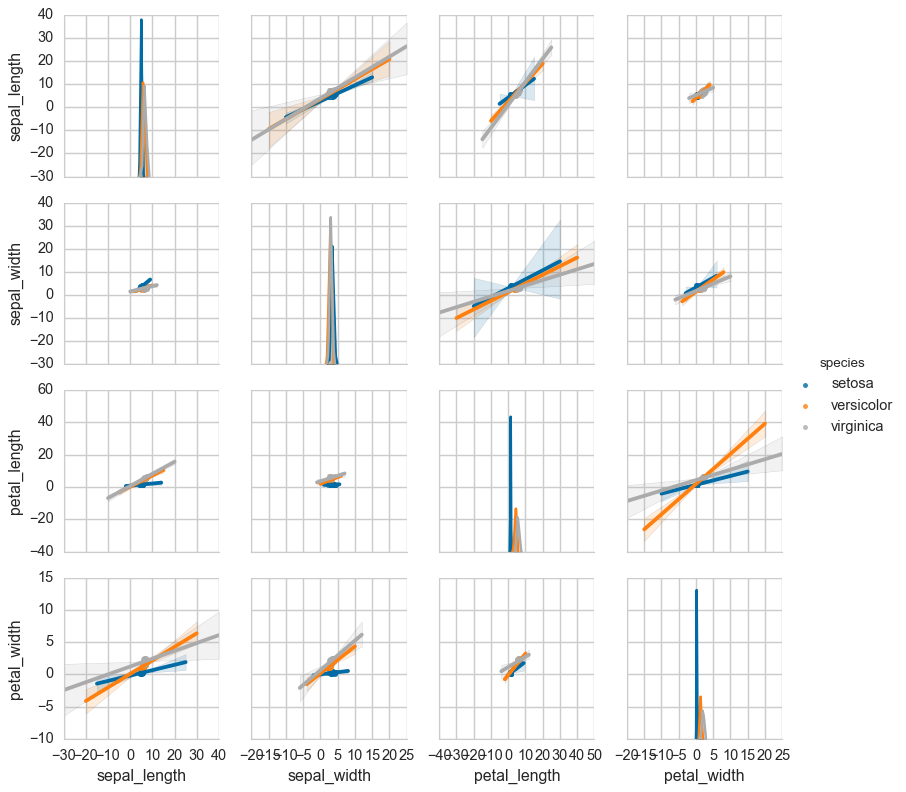

In [71]:
# Load Dataset
df = pd.read_csv("data/iris.csv")

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

# Deviation

## Diverging Bars

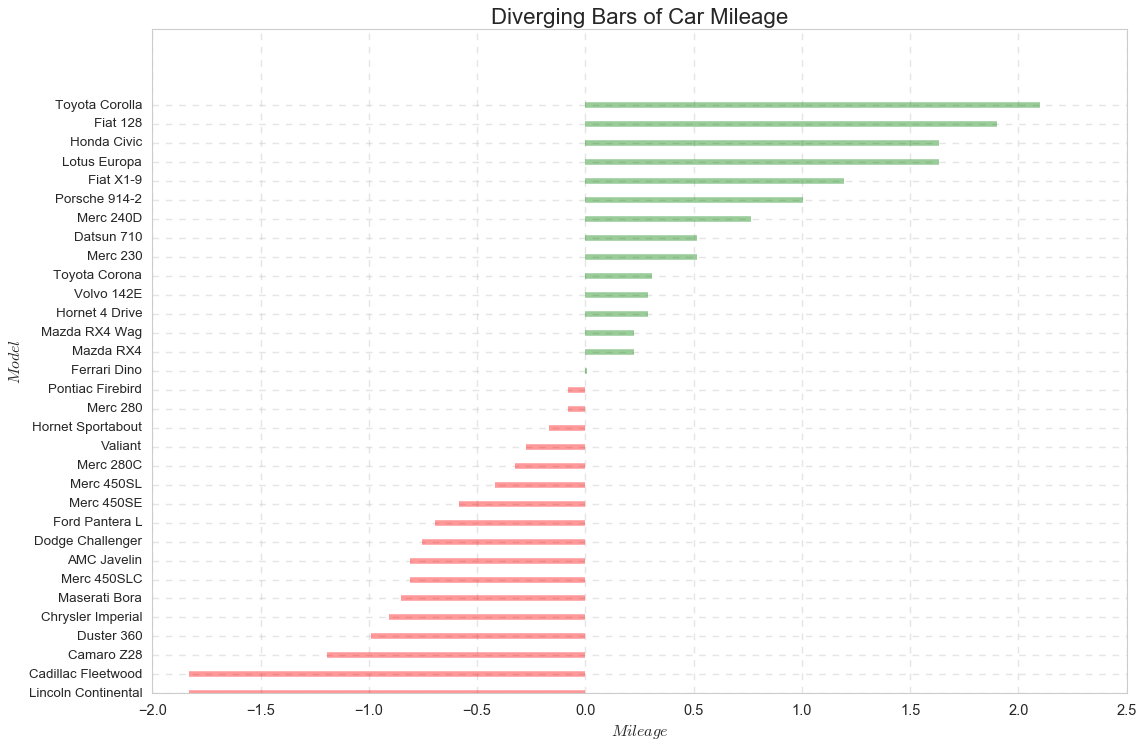

In [72]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Diverging Texts

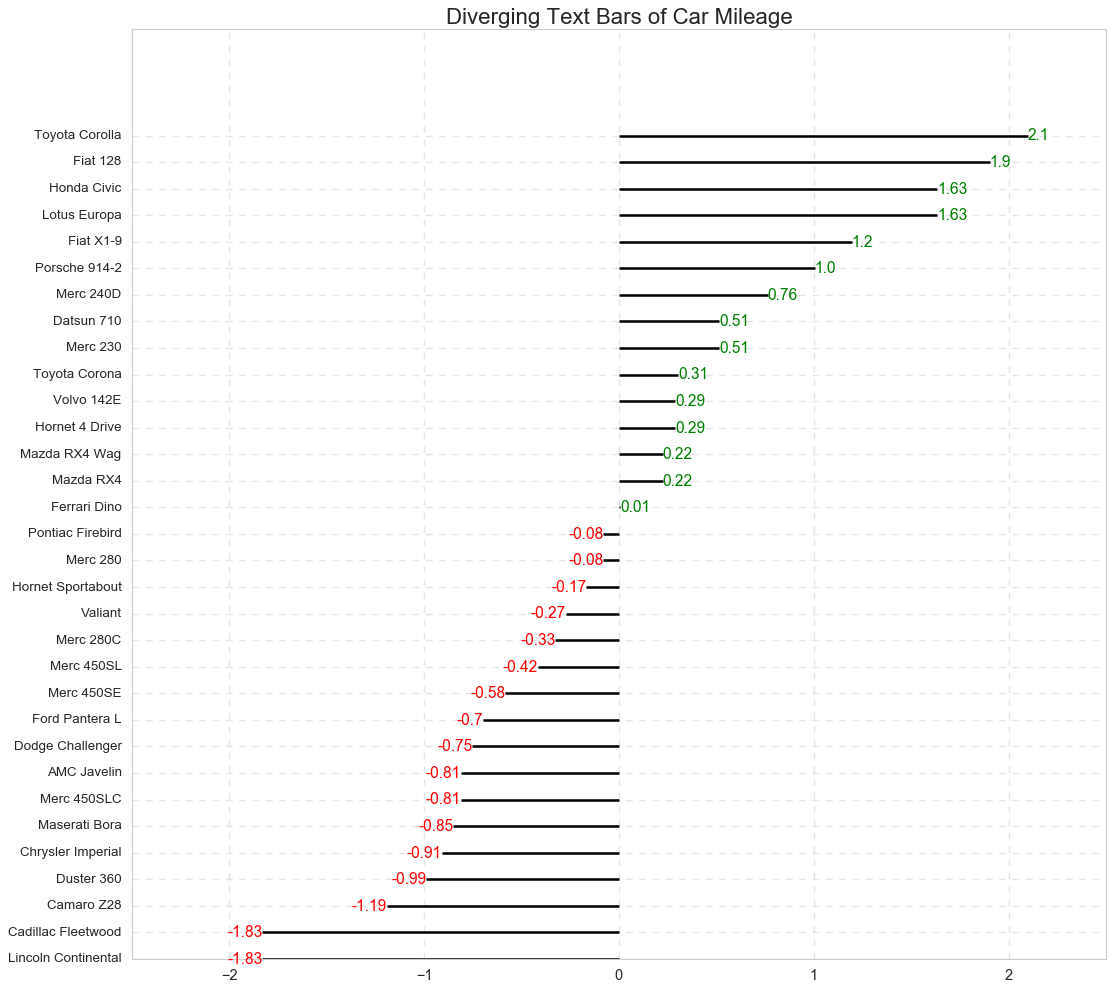

In [73]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## Diverging Dot Plot

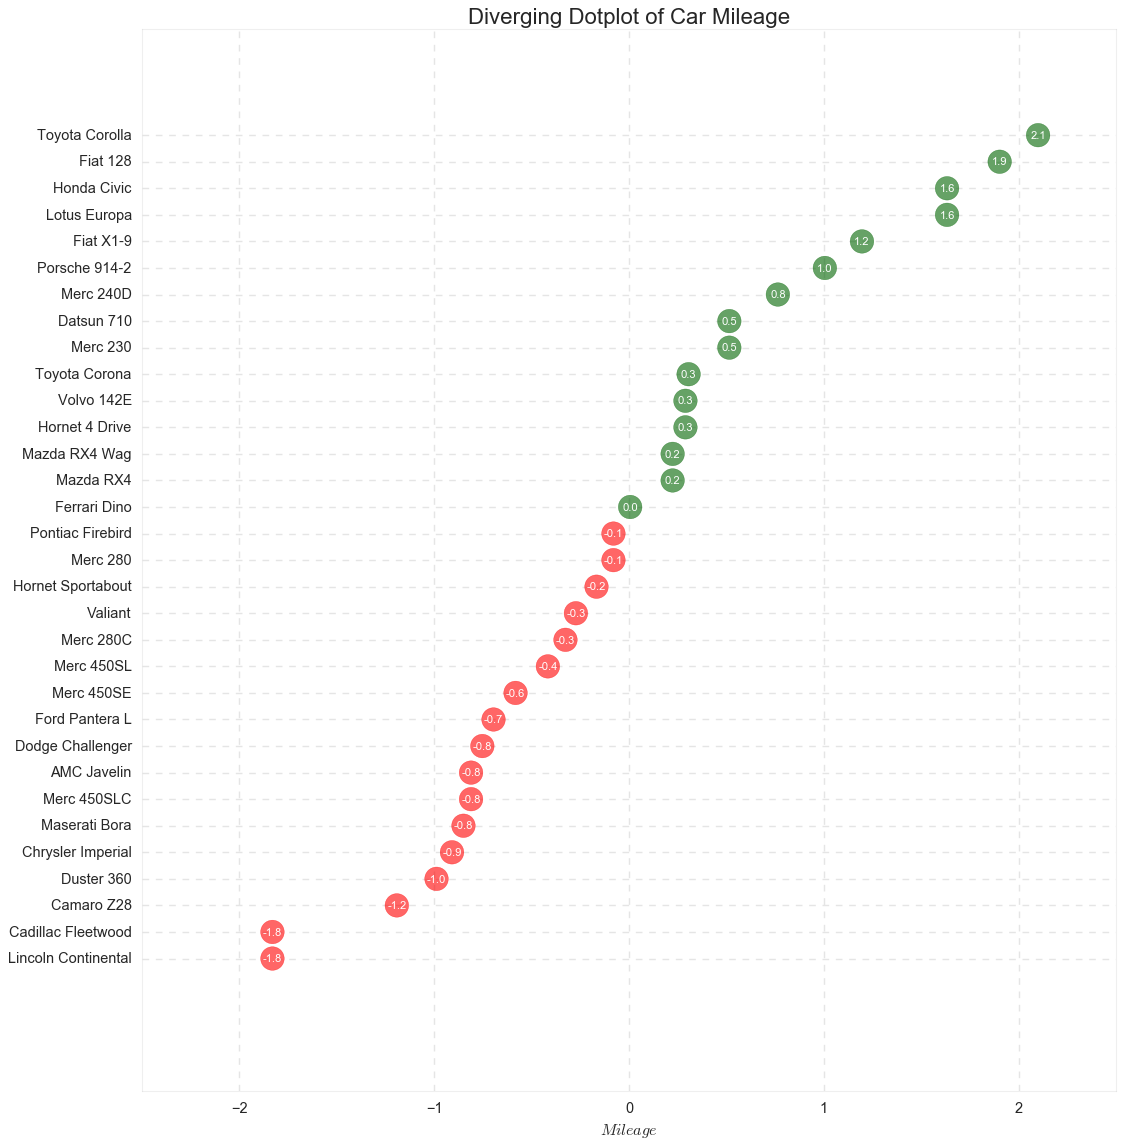

In [74]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## Diverging Lollipop Chart with Markers


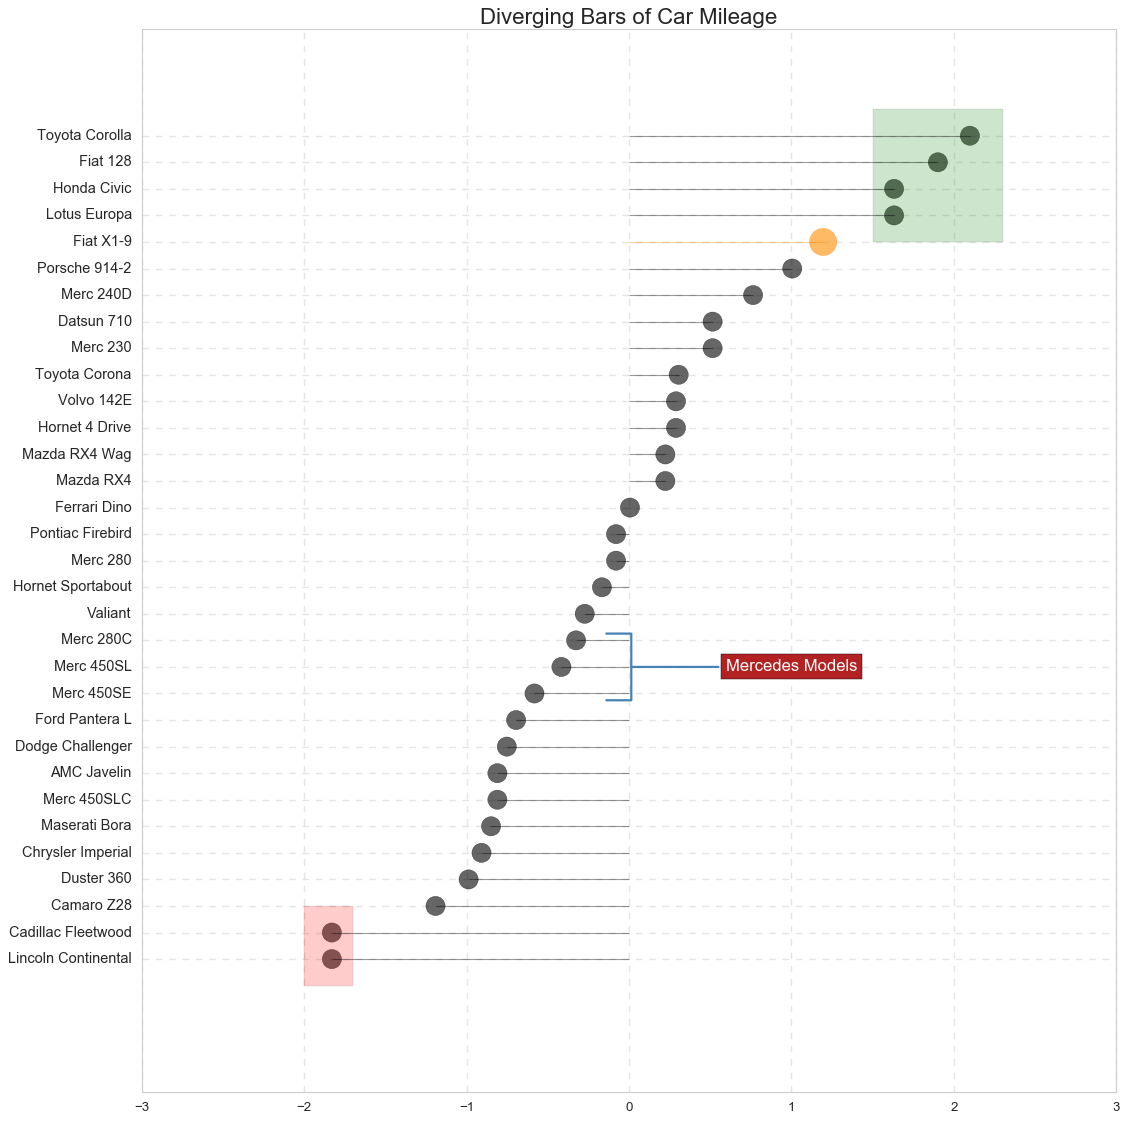

In [77]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = mpl.patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = mpl.patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Area Chart

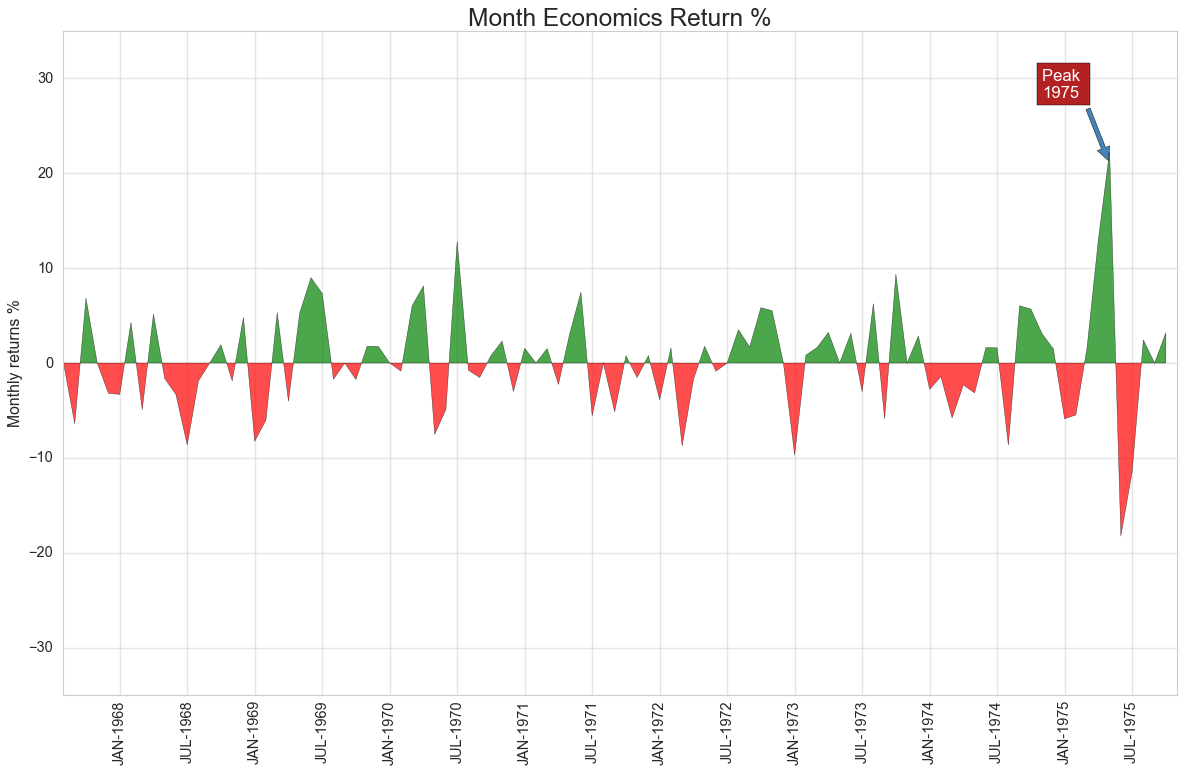

In [78]:
# Prepare Data
df = pd.read_csv("data/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

# Ranking

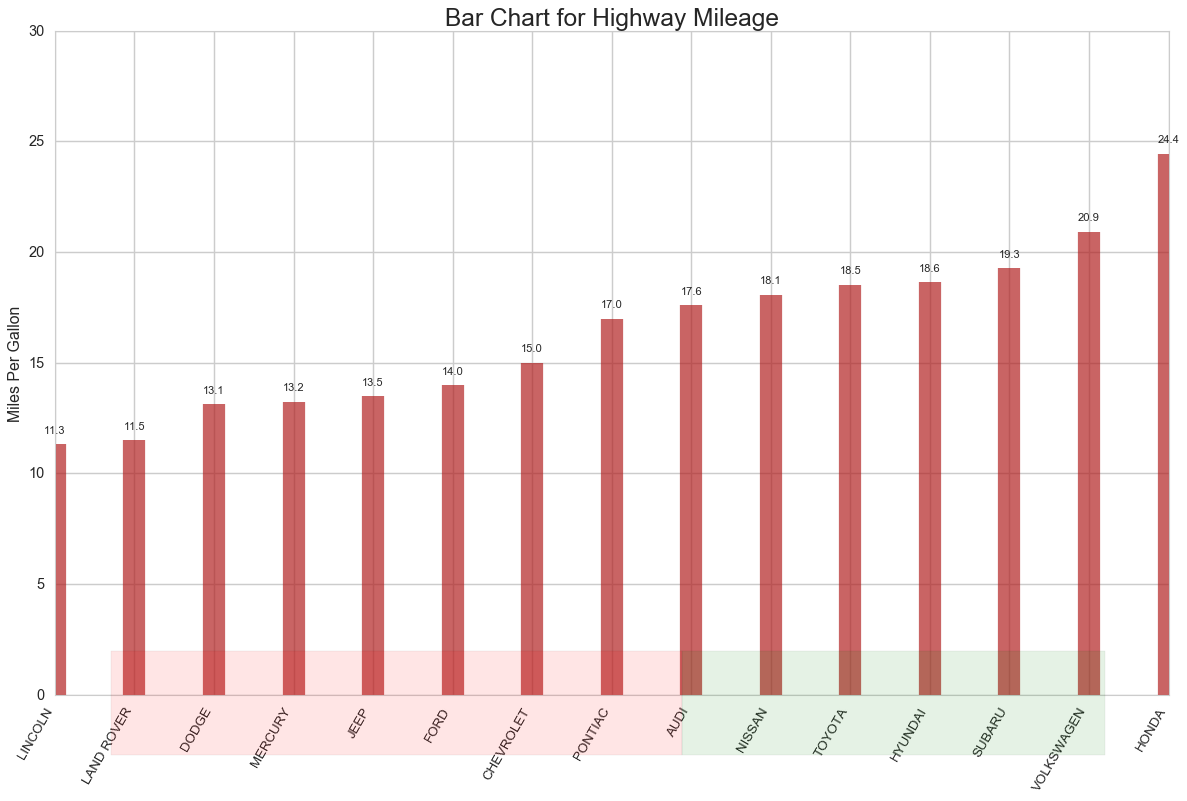

In [79]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = mpl.patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = mpl.patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

## Lollipop Chart

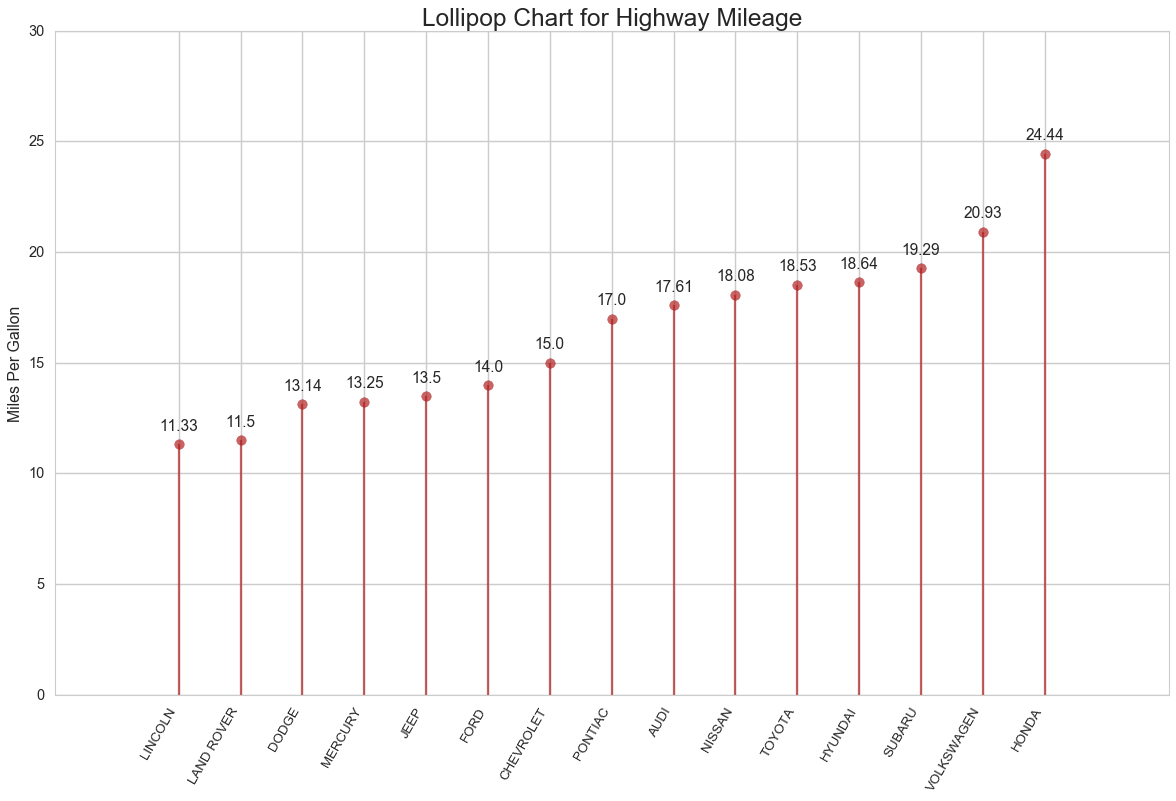

In [80]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

## Dot Plot

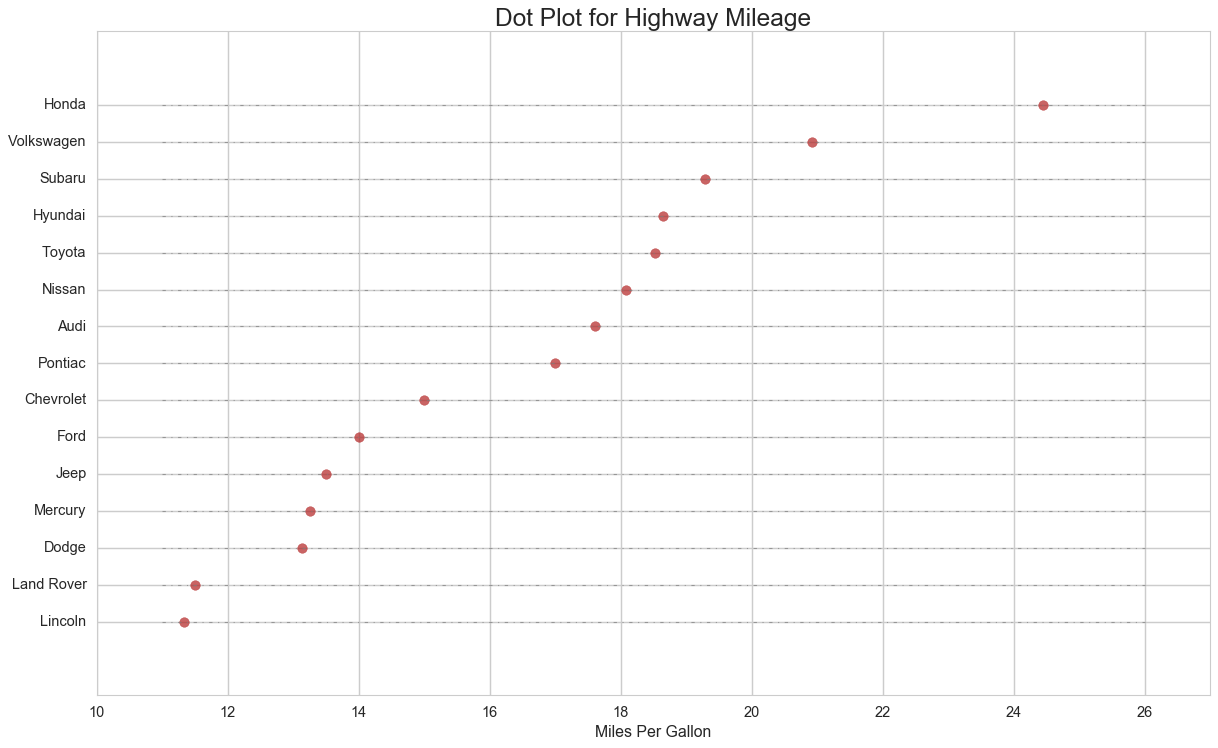

In [81]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

## Slope Chart

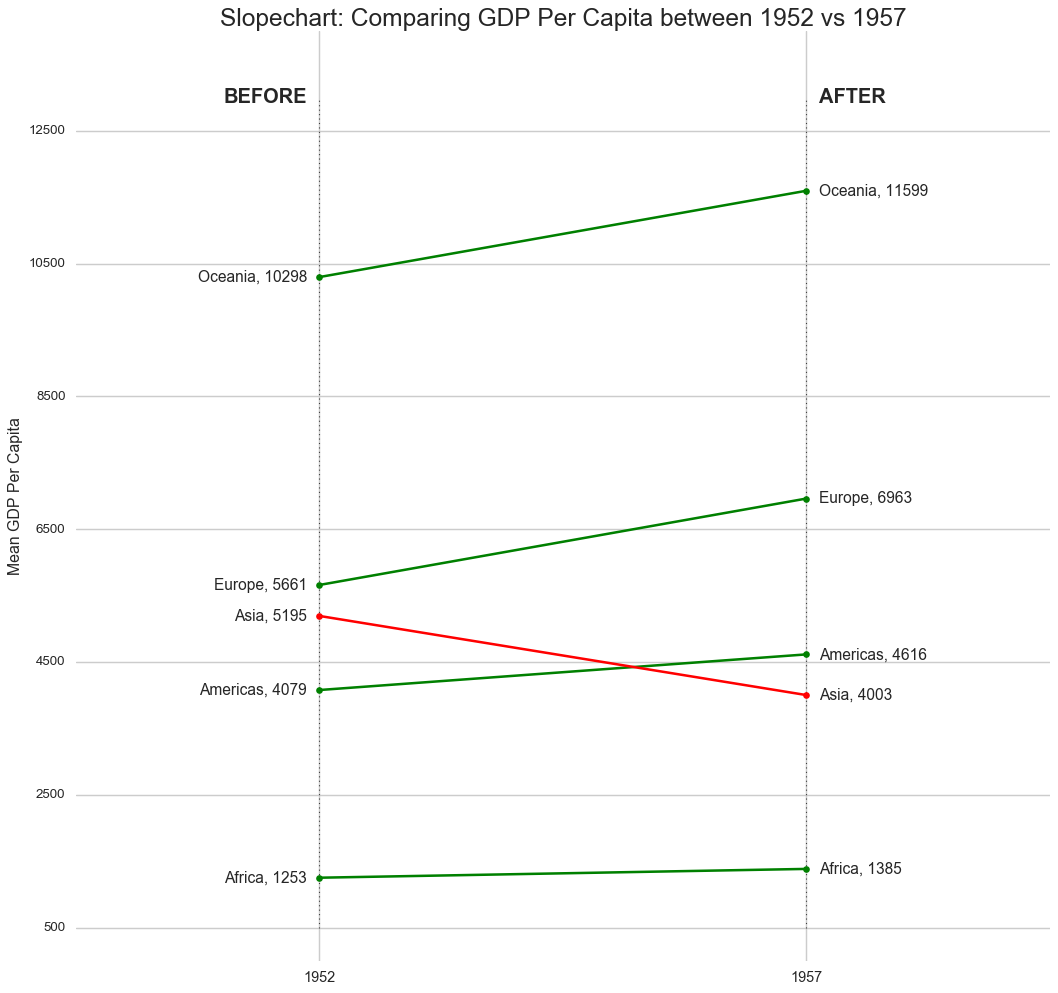

In [82]:
# Import Data
df = pd.read_csv("data/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mpl.lines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

## Dumbbell Plot

Dumbbell plot conveys the ‘before’ and ‘after’ positions of various items along with the rank ordering of the items. Its very useful if you want to visualize the effect of a particular project / initiative on different objects.


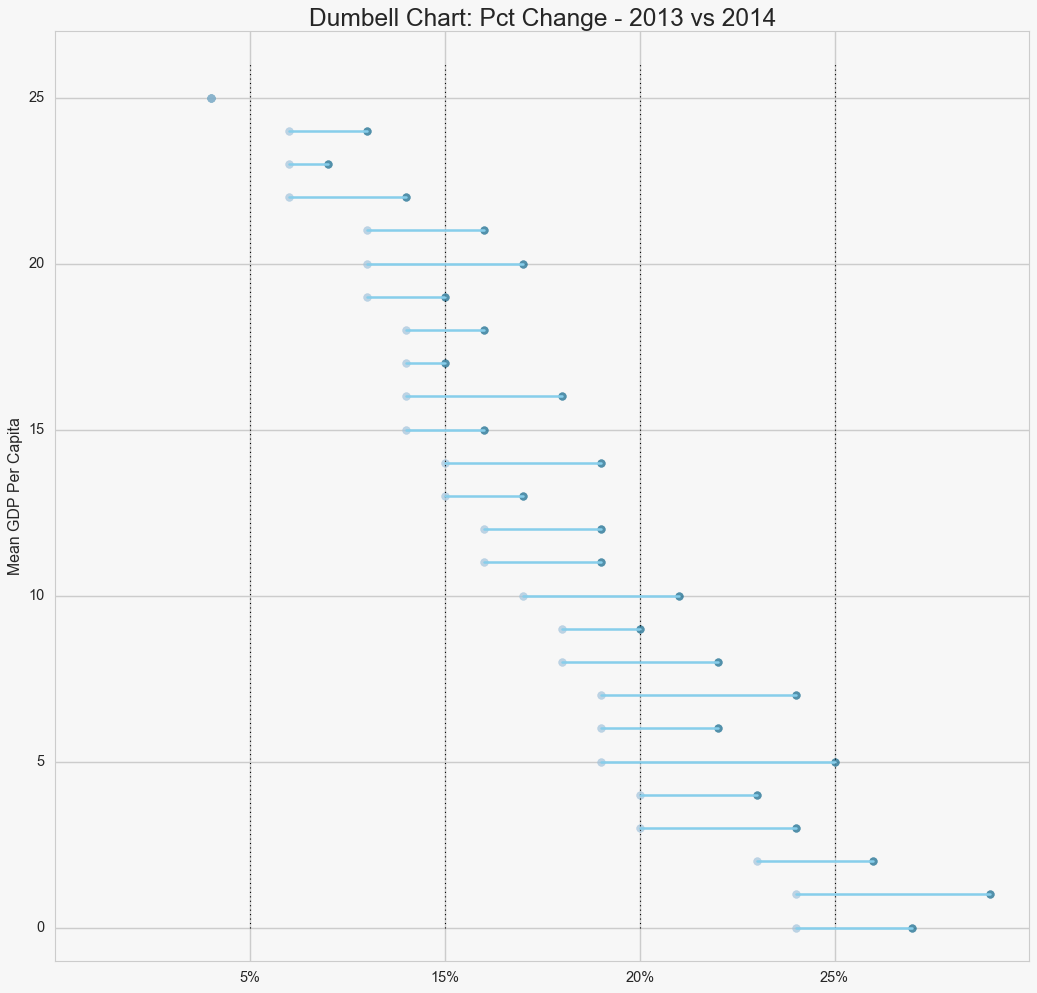

In [83]:
# Import Data
df = pd.read_csv("data/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mpl.lines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()

# Distribution

## Histogram for Continuous Variable


Histogram shows the frequency distribution of a given variable. The below representation groups the frequency bars based on a categorical variable giving a greater insight about the continuous variable and the categorical variable in tandem.

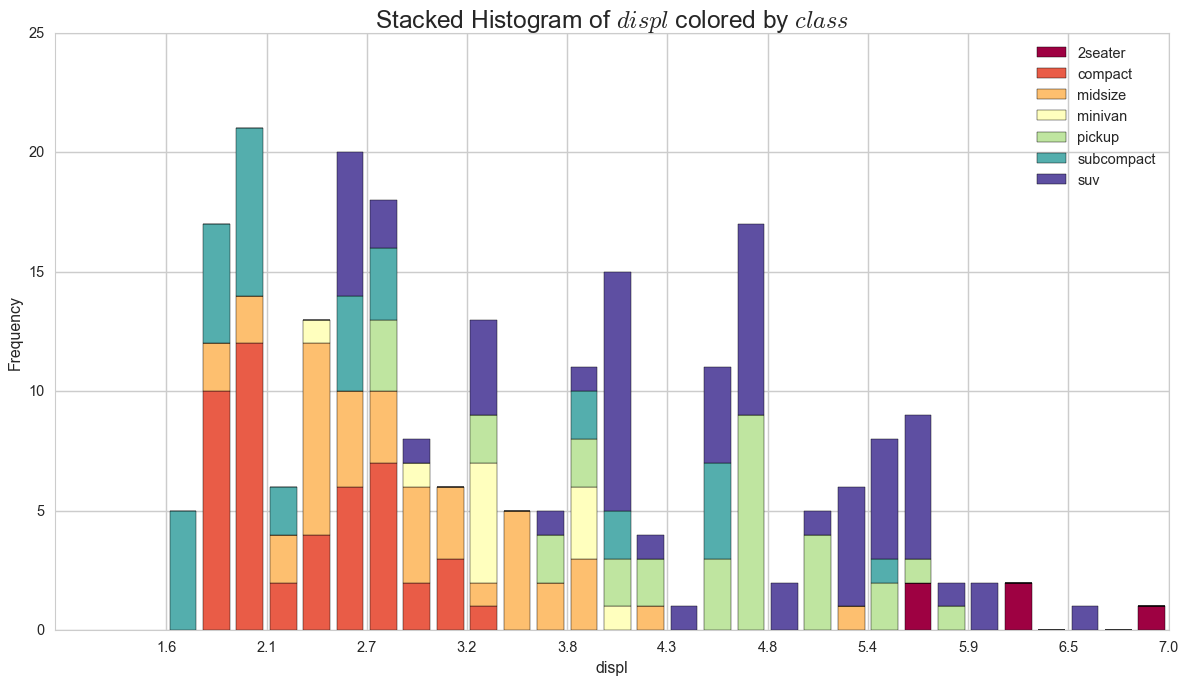

In [84]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

## Histogram for Categorical Variable

The histogram of a categorical variable shows the frequency distribution of a that variable. By coloring the bars, you can visualize the distribution in connection with another categorical variable representing the colors.

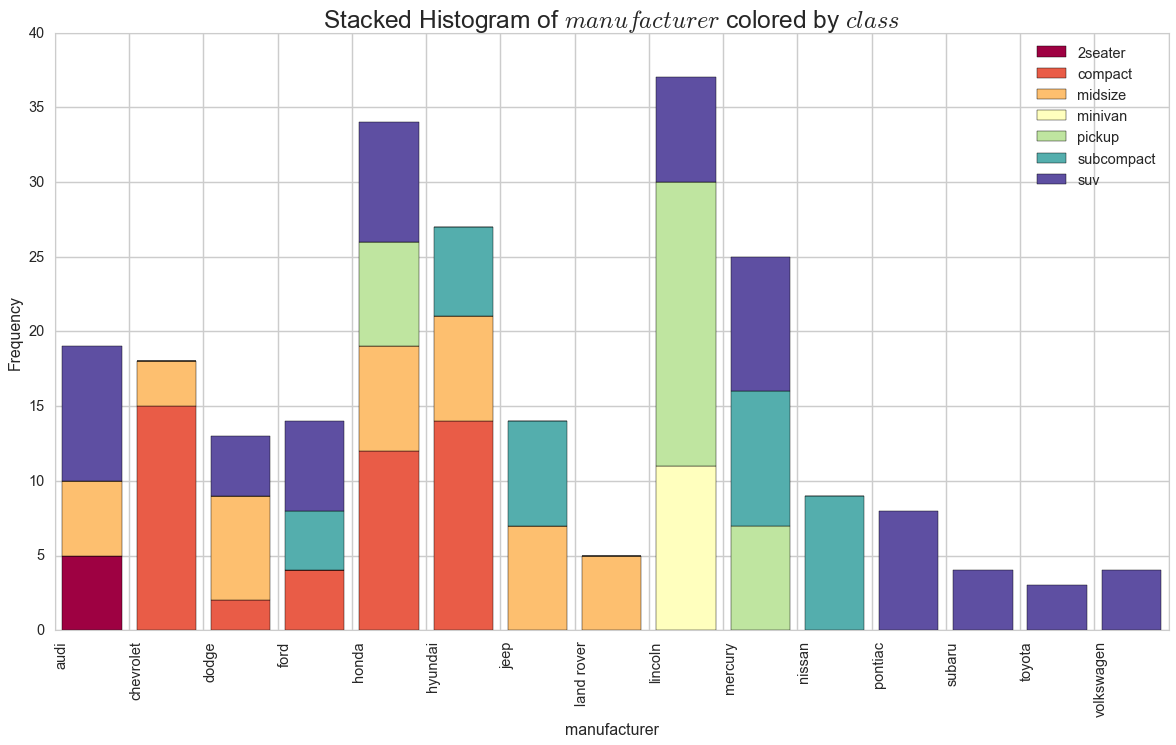

In [85]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

## Descreete DIstribution Historgram

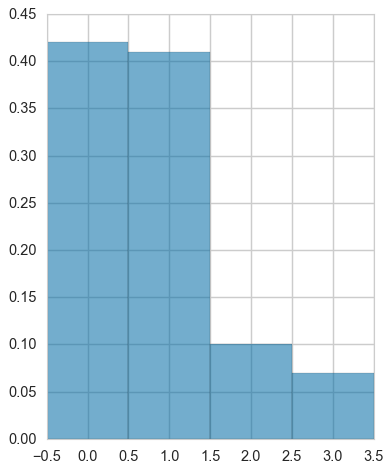

In [86]:
df = pd.DataFrame({'N': list(np.random.poisson(1, 100))})

len_of_uniq_values=len(set(df['N'].sort_values().values.tolist()))

fig, ax = plt.subplots(figsize=(len_of_uniq_values+1,6))

ax.hist(
    df['N'].sort_values().values.tolist(), 
    bins=range(len_of_uniq_values+1), 
    density=True,  
    align="left",
    edgecolor='black', 
    linewidth=0.2, 
    alpha=0.55,
)

ax.set_xlim( round(df['N'].min())-0.5, round(df['N'].max())+0.5 )


fig.tight_layout()

## Density Plot

Density plots are a commonly used tool visualise the distribution of a continuous variable. By grouping them by the ‘response’ variable, you can inspect the relationship between the X and the Y. The below case if for representational purpose to describe how the distribution of city mileage varies with respect the number of cylinders.

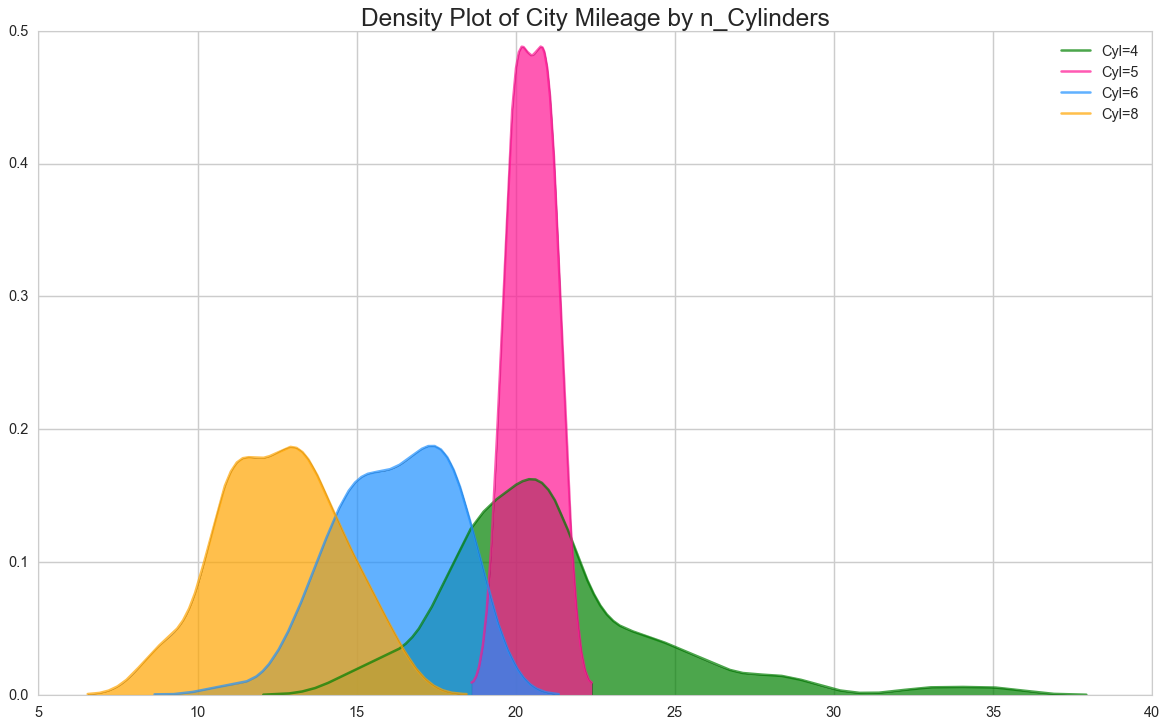

In [87]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

## Density Curves with Histogram

Density curve with histogram brings together the collective information conveyed by the two plots so you can have them both in a single figure instead of two.

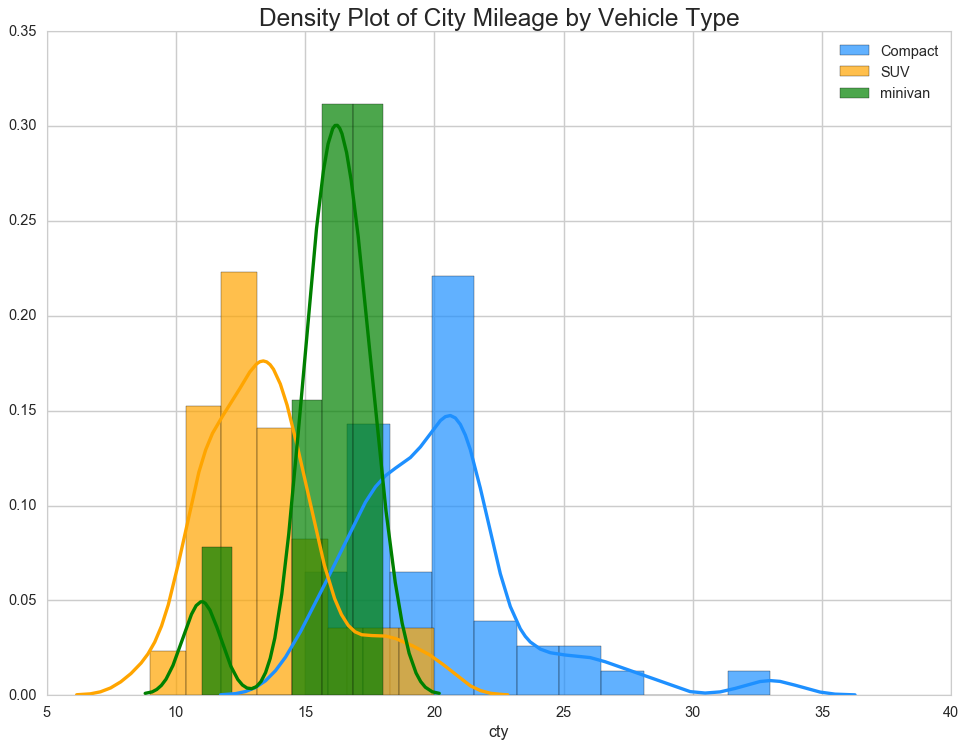

In [88]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

## Joy Plot
Joy Plot allows the density curves of different groups to overlap, it is a great way to visualize the distribution of a larger number of groups in relation to each other. It looks pleasing to the eye and conveys just the right information clearly. It can be easily built using the joypy package which is based on matplotlib.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 1280x800 with 0 Axes>

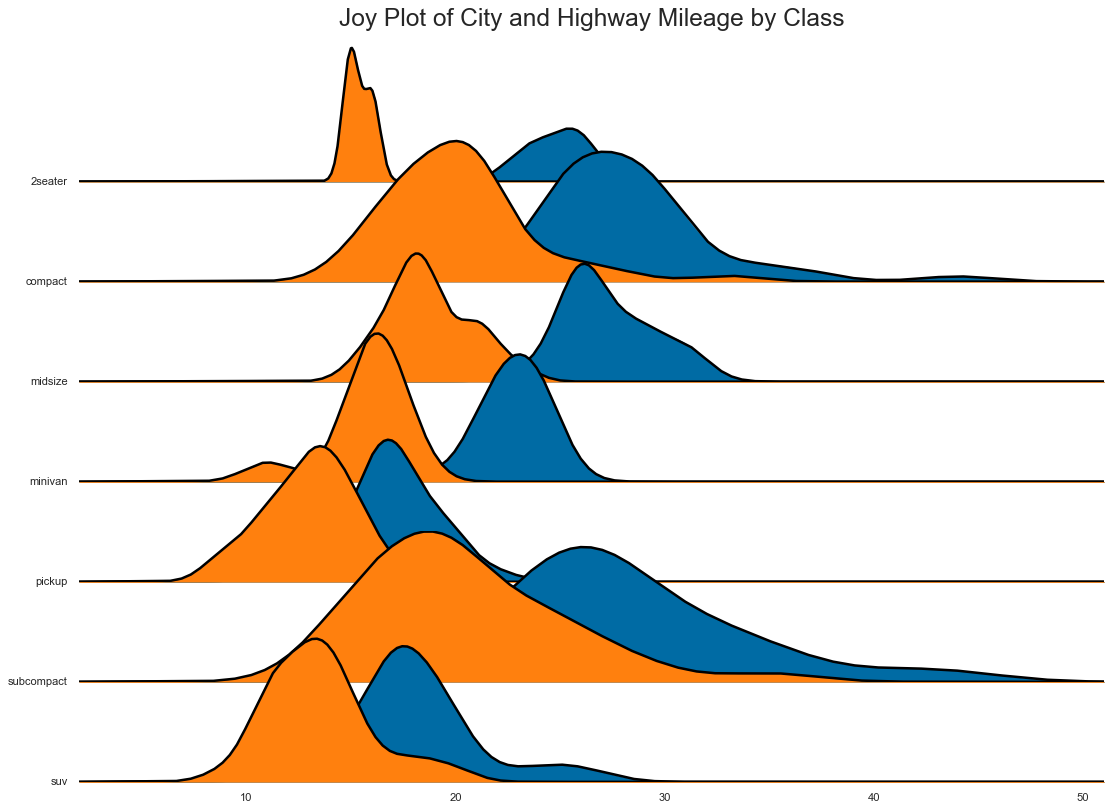

In [89]:
!pip3 install joypy 2>&1 1>/dev/null
import joypy

# Import Data
mpg = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

## Distributed Dot Plot

Distributed dot plot shows the univariate distribution of points segmented by groups. The darker the points, more is the concentration of data points in that region. By coloring the median differently, the real positioning of the groups becomes apparent instantly.

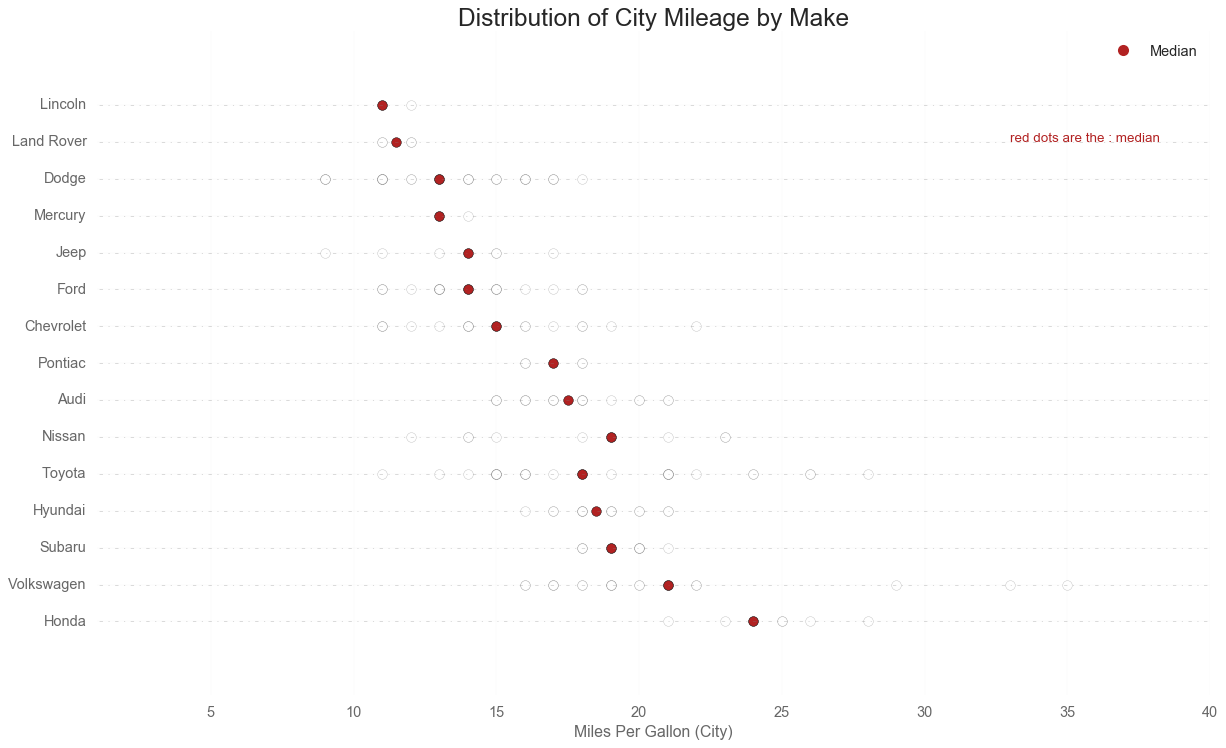

In [90]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "red dots are the : median", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

## Box Plot

Box plots are a great way to visualize the distribution, keeping the median, 25th 75th quartiles and the outliers in mind. However, you need to be careful about interpreting the size the boxes which can potentially distort the number of points contained within that group. So, manually providing the number of observations in each box can help overcome this drawback.

For example, the first two boxes on the left have boxes of the same size even though they have 5 and 47 obs respectively. So writing the number of observations in that group becomes necessary.

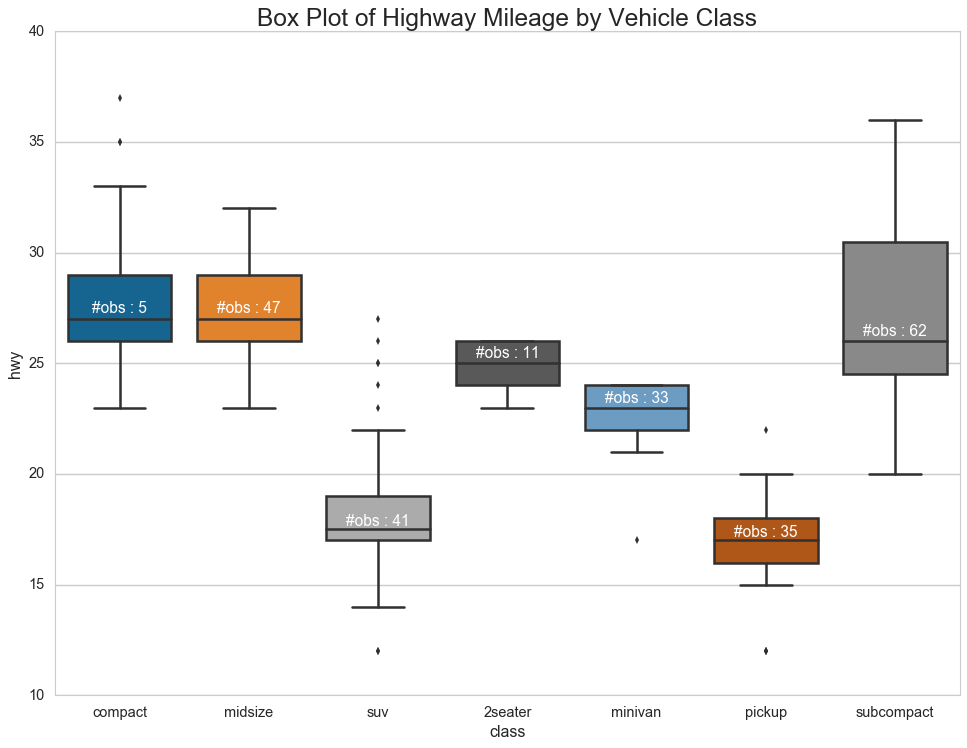

In [91]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

## Dot + Box Plot

Dot + Box plot Conveys similar information as a boxplot split in groups. The dots, in addition, gives a sense of how many data points lie within each group.

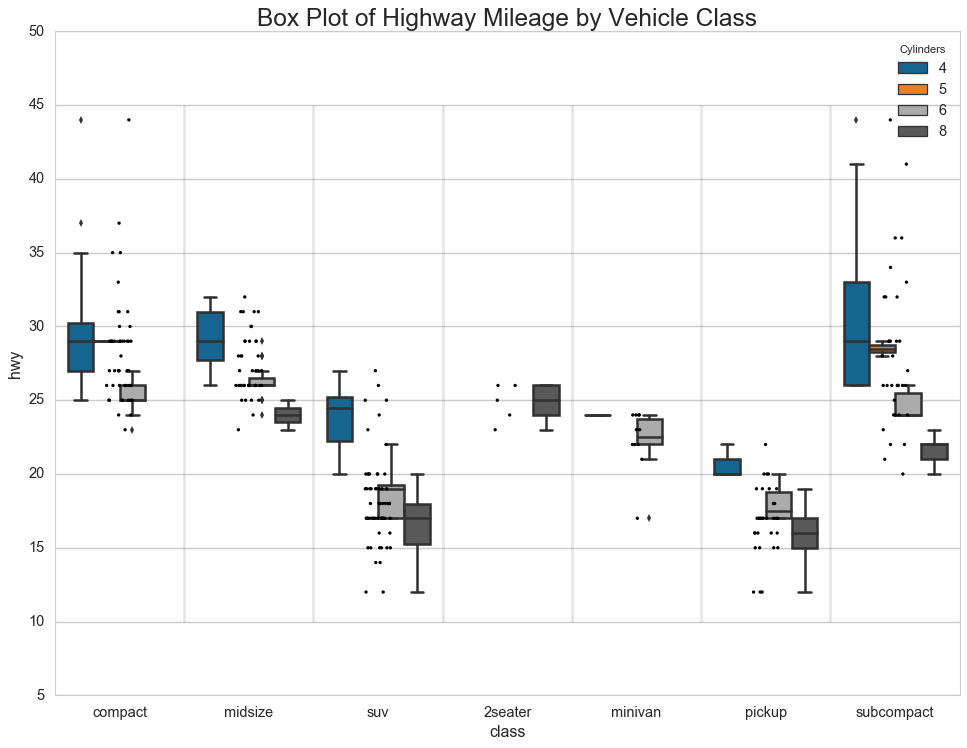

In [92]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

## Violin Plot

Violin plot is a visually pleasing alternative to box plots. The shape or area of the violin depends on the number of observations it holds. However, the violin plots can be harder to read and it not commonly used in professional settings.

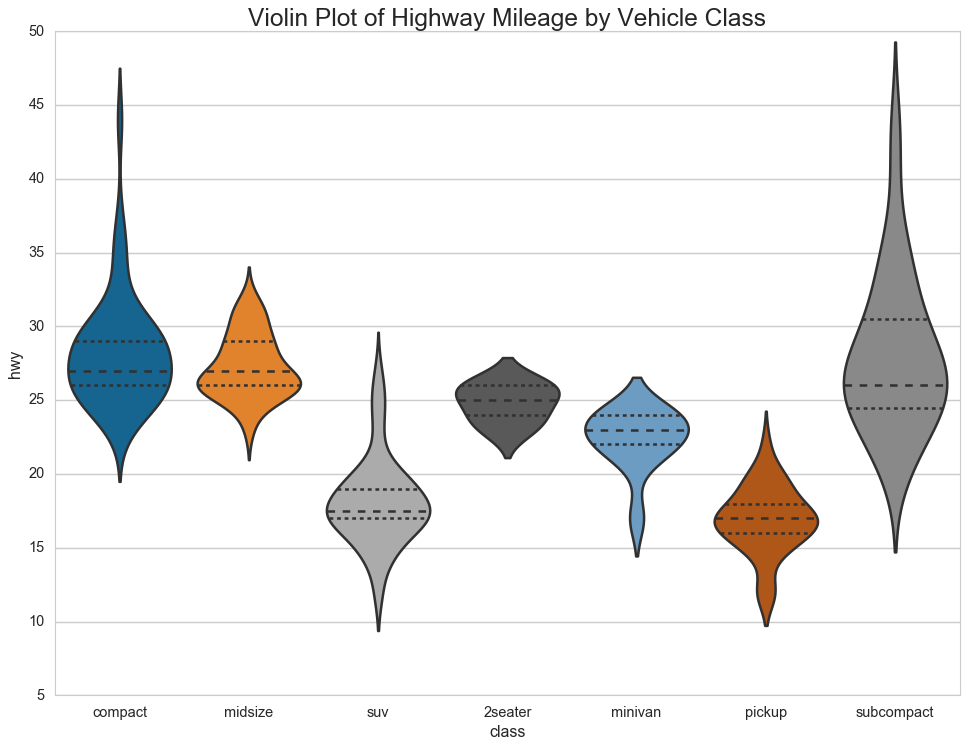

In [93]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

## Violin Plot (matplotlib)

Pretty rudimentary for now

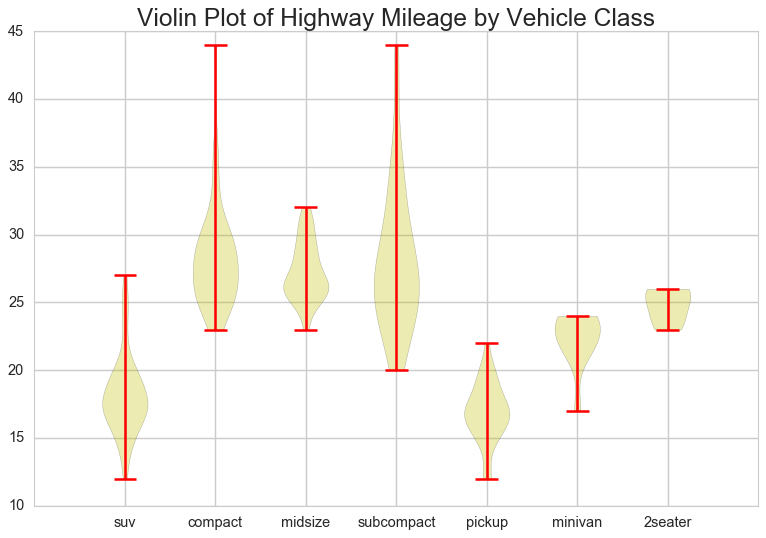

In [94]:
df = pd.read_csv("data/mpg_ggplot2.csv")
fig,ax = plt.subplots()
names = df['class'].value_counts().keys().tolist()
for k, name in enumerate(names):
    ax.violinplot(df[df['class'] == name]['hwy'].values.tolist(), positions=[k])

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(list(names))

plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

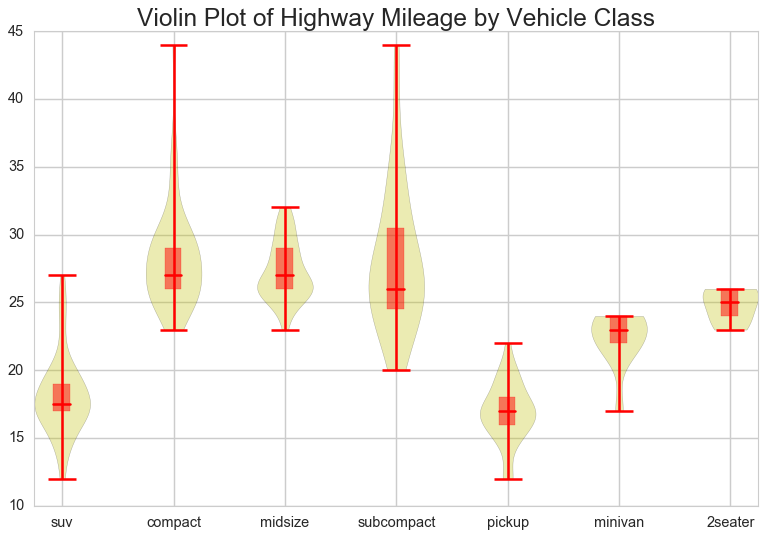

In [95]:
df = pd.read_csv("data/mpg_ggplot2.csv")
fig,ax = plt.subplots()
names = df['class'].value_counts().keys().tolist()
for k, name in enumerate(names):
        
    data=df[df['class'] == name]['hwy'].values.tolist()
    
    vp=ax.violinplot(data, positions=[k])
    color = vp['cbars'].get_color()[0]
    
    #plot the IQR
    w = 0.075
    xx = k + np.array([-1,1])*w - 0.005
    ax.fill_between(xx,*np.percentile(data, [25,75]),color=color,alpha=0.5)
    
     # These can also be done by ax.violinplot
    ax.plot(xx, [np.median(data)]*2,'-',color=color)

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(list(names))


ax.fill_between([],[],color='k',label='IQR')
ax.plot([],[],color='k',label='median')

plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

## Population Pyramid
Population pyramid can be used to show either the distribution of the groups ordered by the volumne. Or it can also be used to show the stage-by-stage filtering of the population as it is used below to show how many people pass through each stage of a marketing funnel.

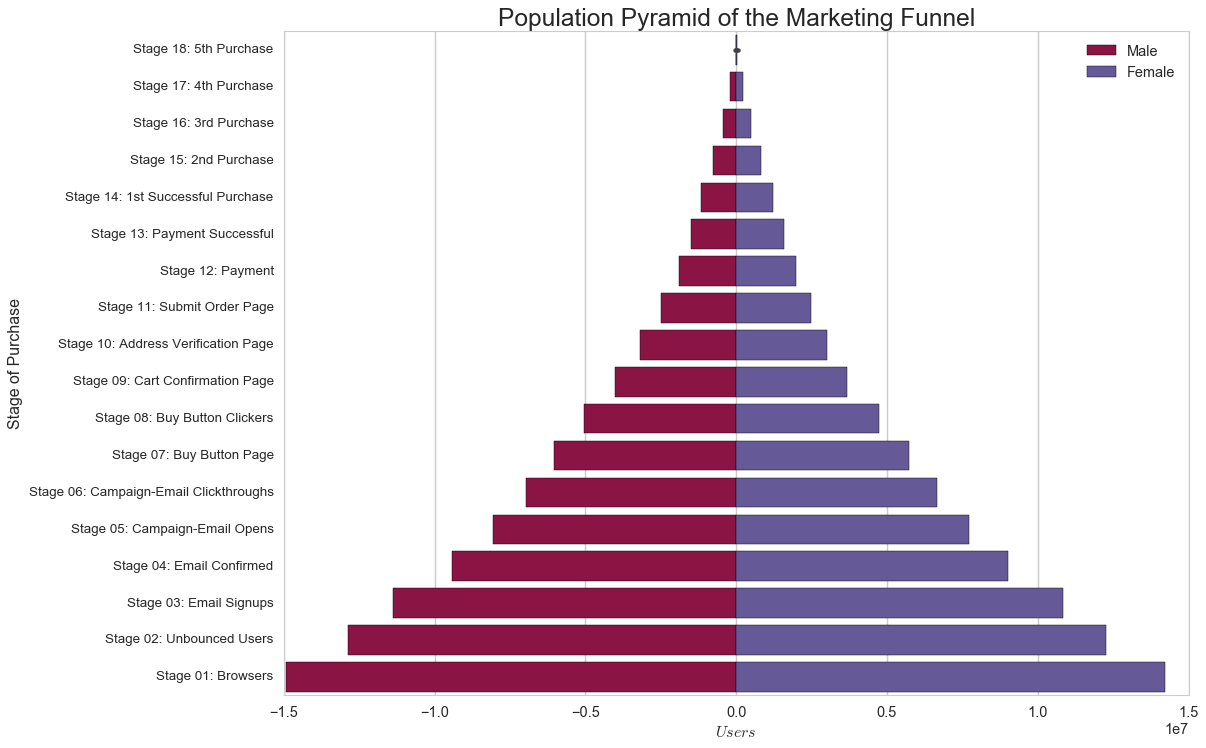

In [97]:
# Read data
df = pd.read_csv("data/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

# Categorical Plots
Categorical plots provided by the seaborn library can be used to visualize the counts distribution of 2 ore more categorical variables in relation to each other.

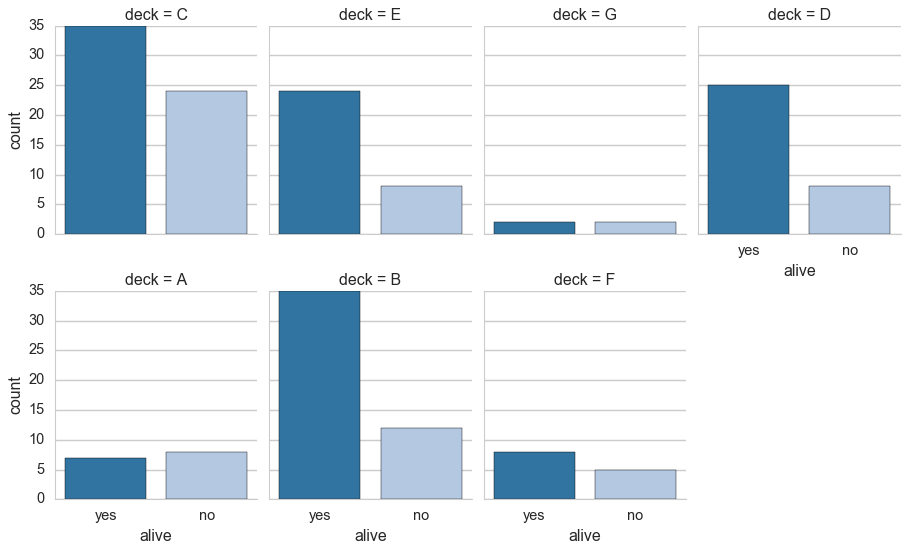

In [98]:
# Load Dataset
titanic = pd.read_csv("data/titanic.csv")

# Plot
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

fig.suptitle('sf')
plt.show()

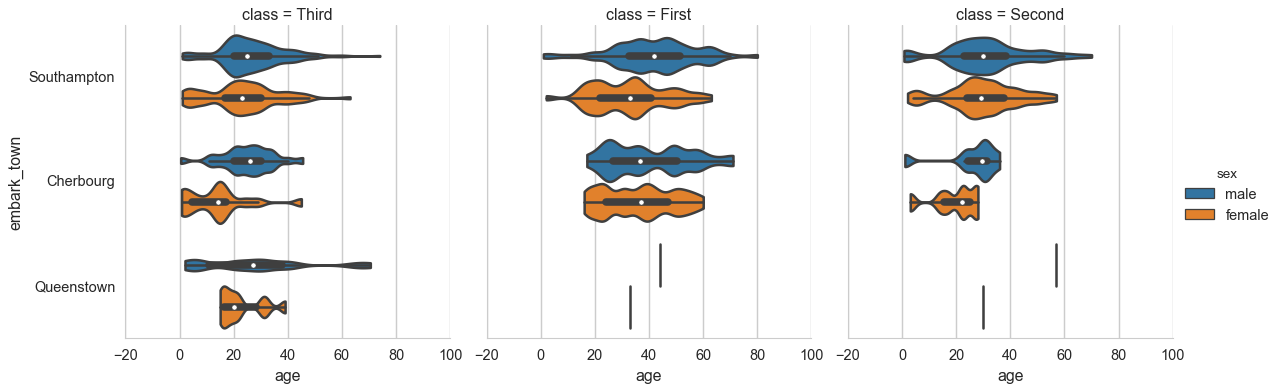

In [99]:
# Load Dataset
titanic = pd.read_csv("data/titanic.csv")

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

# Composition

## Waffle Chart
The waffle chart can be created using the pywaffle package and is used to show the compositions of groups in a larger population.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


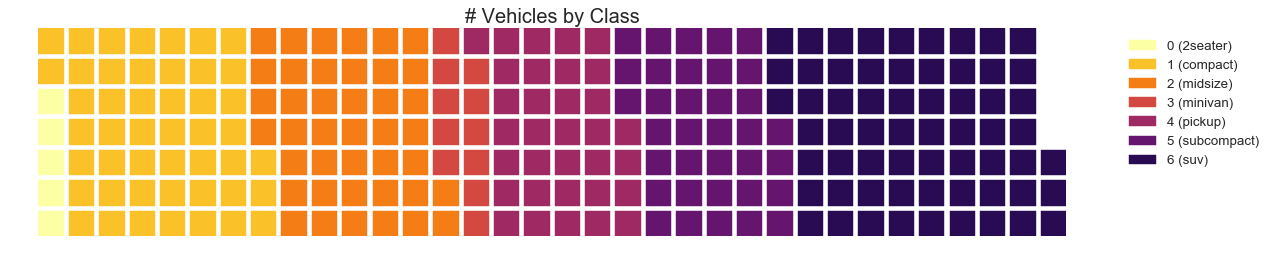

In [100]:
! pip3 install pywaffle 2>&1 1>/dev/null
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

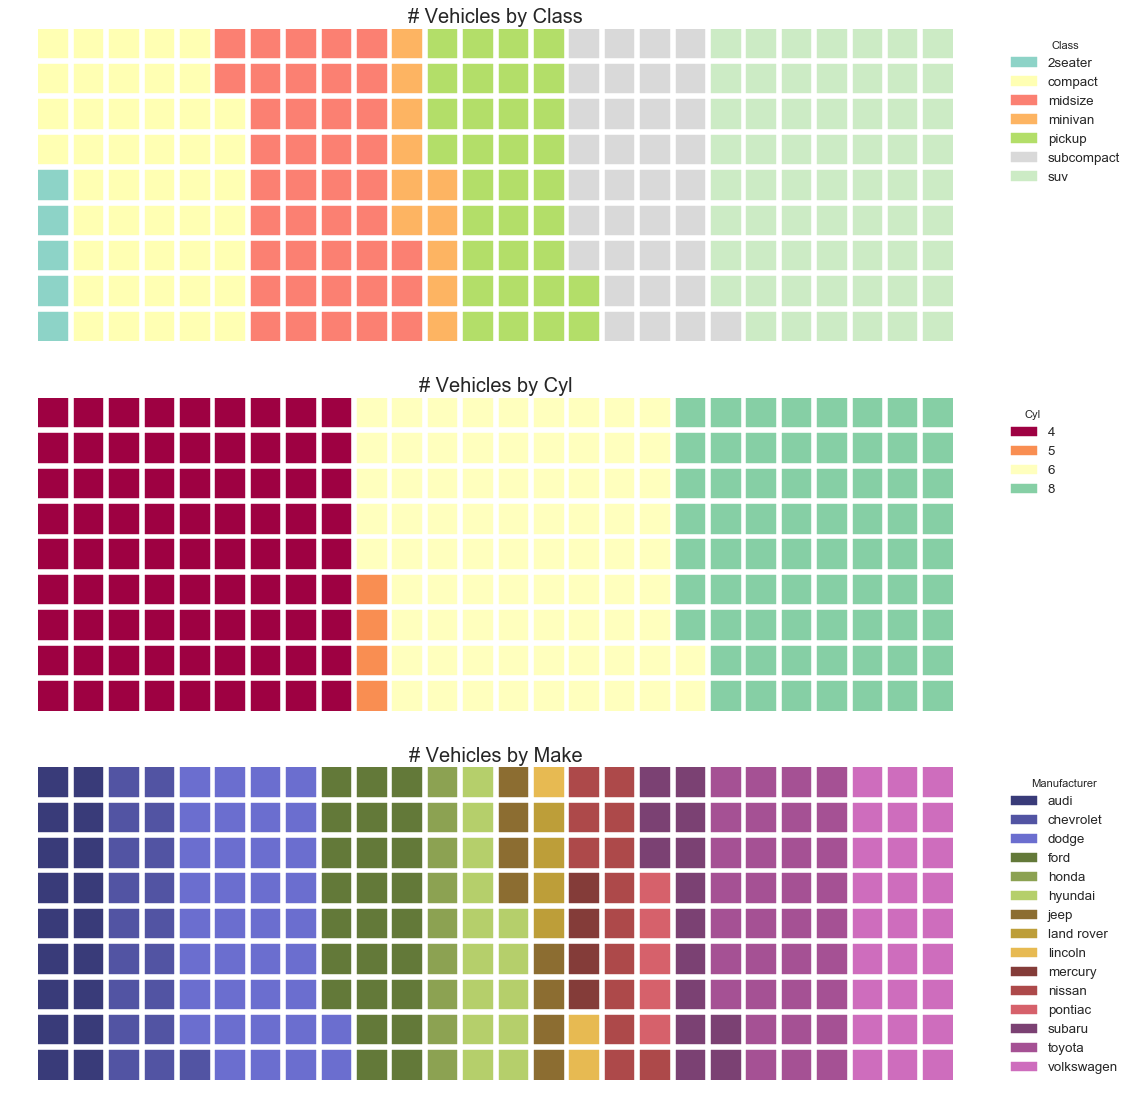

In [101]:
! pip3 install pywaffle  2>&1 1>/dev/null
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)

## Pie Chart
Pie chart is a classic way to show the composition of groups. However, its not generally advisable to use nowadays because the area of the pie portions can sometimes become misleading. So, if you are to use pie chart, its highly recommended to explicitly write down the percentage or numbers for each portion of the pie.

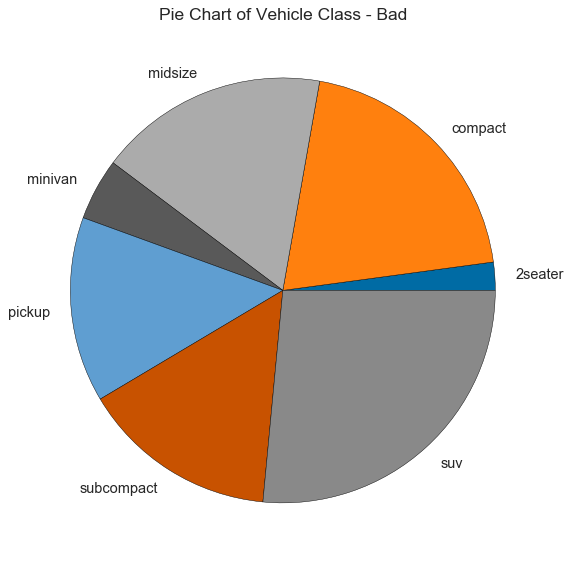

In [102]:
# Import
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

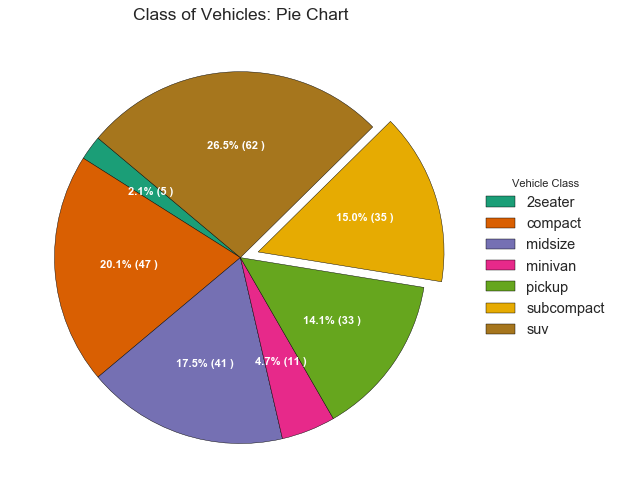

In [103]:
# Import
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

## Treemap

Tree map is similar to a pie chart and it does a better work without misleading the contributions by each group.

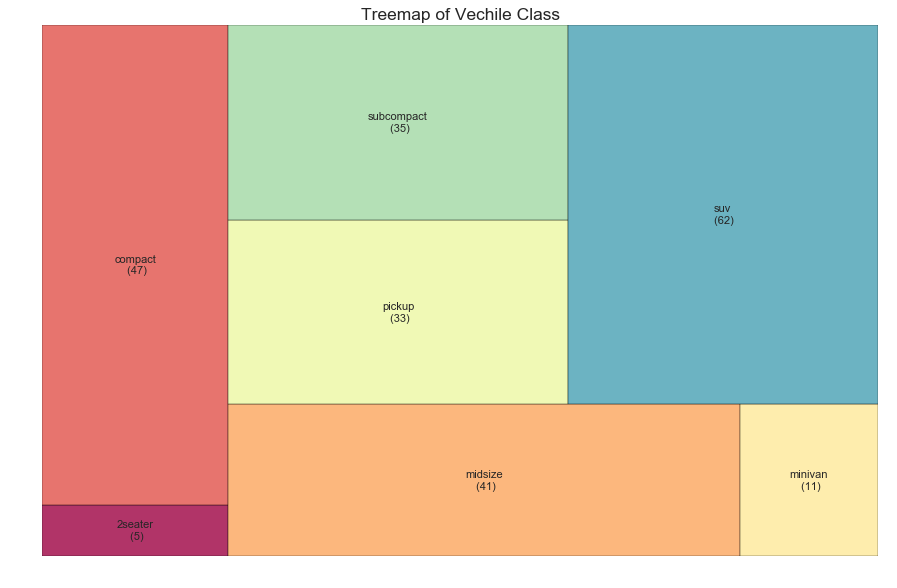

In [104]:
!pip3 install squarify  2>&1 1>/dev/null
import squarify 

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

## Bar Chart
Bar chart is a classic way of visualizing items based on counts or any given metric. In below chart, I have used a different color for each item, but you might typically want to pick one color for all items unless you to color them by groups. The color names get stored inside all_colors in the code below. You can change the color of the bars by setting the color parameter in `plt.plot()`.



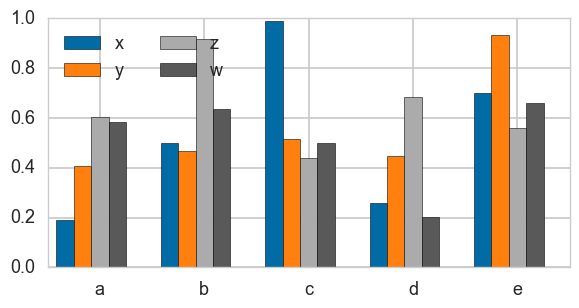

In [105]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100,num=1)

Nbins = 5
Nbars = 4 # Number of bars (items) per bin

width = 1.0 /(Nbars+2)
ind = np.arange(Nbins)

# generate random data for now
np.random.seed(44328)
Data = [np.random.uniform(size=Nbins) for i in range(Nbars)]
labels = ['x','y','z','w']

for ii,dat_item in enumerate(Data):
    ax.bar(ind + (ii+1)*width,dat_item,width,label=labels[ii])

ax.set_xticks(ind+0.5)
ax.set_xticklabels(['a','b','c','d','e'])
ax.legend(loc=2,ncol=2)  

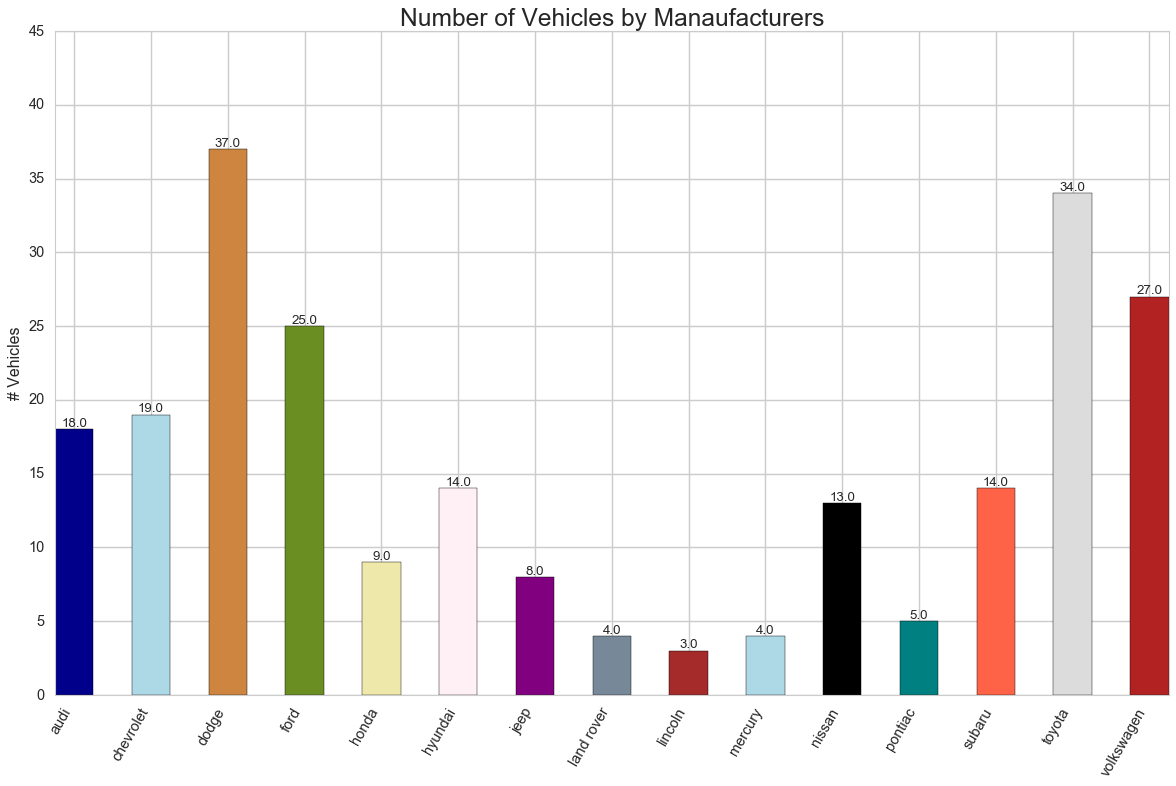

In [106]:
import random

# Import Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

# Change

## Time Series Plot

Time series plot is used to visualise how a given metric changes over time. Here you can see how the Air Passenger traffic changed between 1949 and 1969.

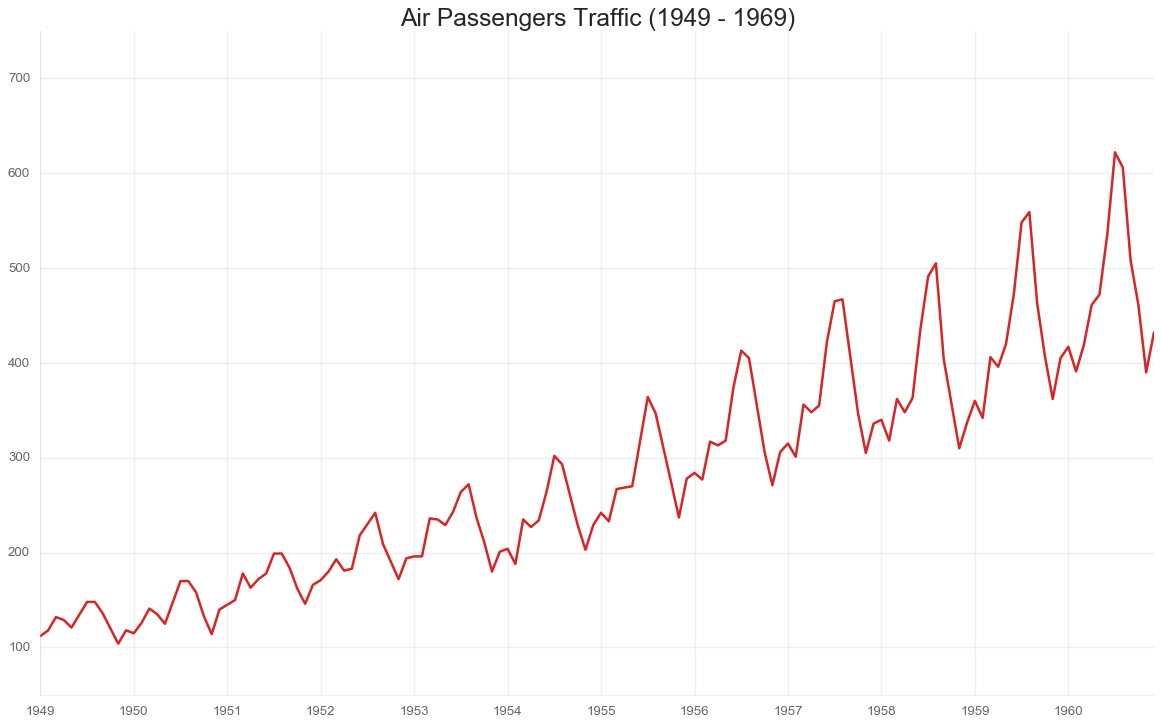

In [107]:
# Import Data
df = pd.read_csv('data/AirPassengers.csv')

# Draw Plot
plt.figure(figsize=(16,10), dpi=80)
plt.plot('date', 'traffic', data=df, color='tab:red')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

## Time Series with Peaks and Troughs Annotated

The below time series plots all the the peaks and troughs and annotates the occurence of selected special events.

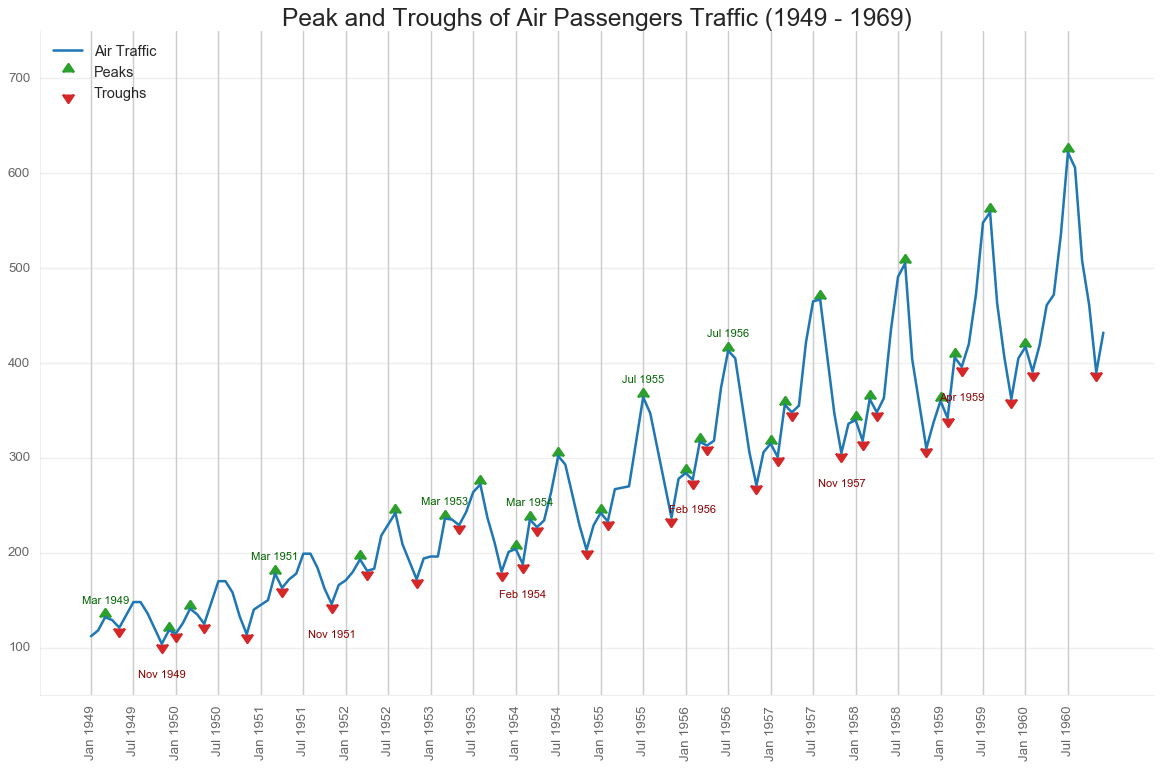

In [108]:
# Import Data
df = pd.read_csv('data/AirPassengers.csv')

# Get the Peaks and Troughs
data = df['traffic'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.traffic[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.traffic[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

## Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot

The ACF plot shows the correlation of the time series with its own lags. Each vertical line (on the autocorrelation plot) represents the correlation between the series and its lag starting from lag 0. The blue shaded region in the plot is the significance level. Those lags that lie above the blue line are the significant lags.

So how to interpret this?

For AirPassengers, we see upto 14 lags have crossed the blue line and so are significant. This means, the Air Passengers traffic seen upto 14 years back has an influence on the traffic seen today.

PACF on the other had shows the autocorrelation of any given lag (of time series) against the current series, but with the contributions of the lags-inbetween removed.

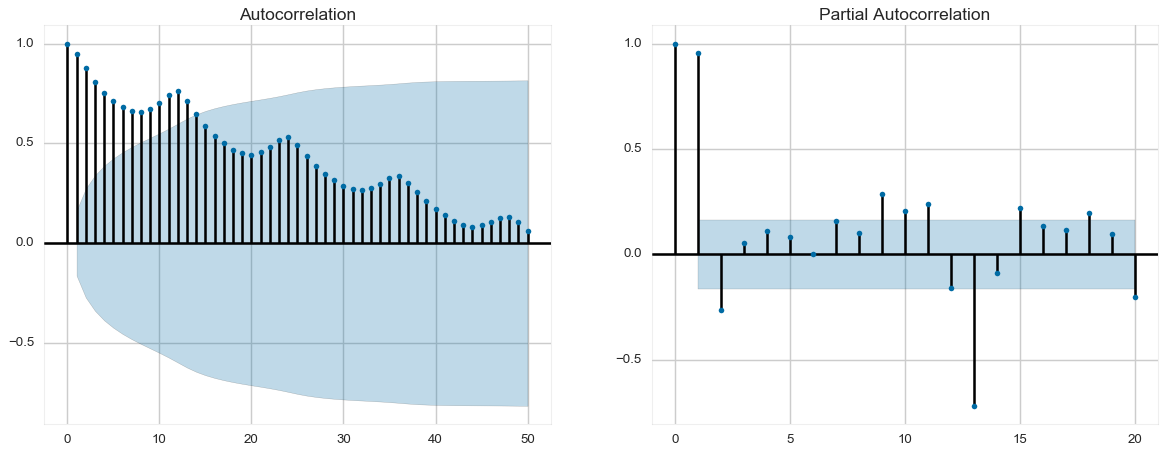

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = pd.read_csv('data/AirPassengers.csv')

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df.traffic.tolist(), ax=ax1, lags=50)
plot_pacf(df.traffic.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

## Cross Correlation plot

Cross correlation plot shows the lags of two time series with each other.

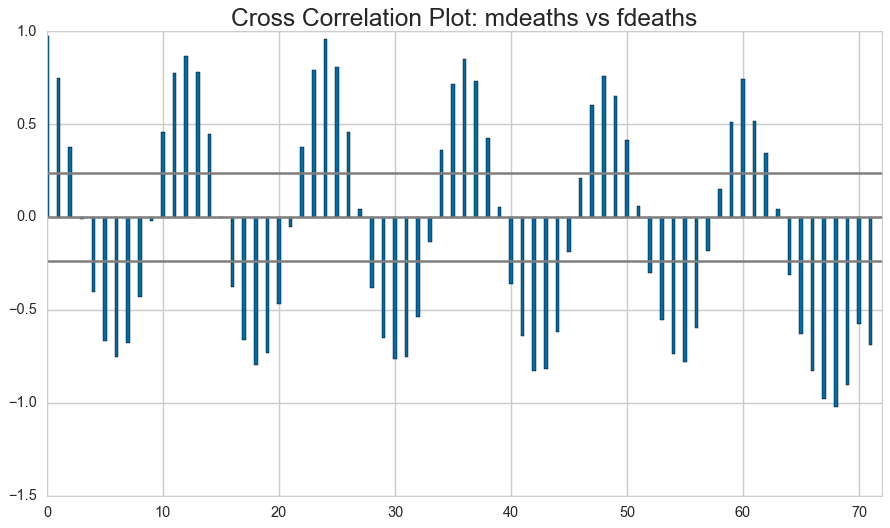

In [111]:
import statsmodels.tsa.stattools as stattools

# Import Data
df = pd.read_csv('data/mortality.csv')
x = df['mdeaths']
y = df['fdeaths']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decoration
plt.title('Cross Correlation Plot: mdeaths vs fdeaths', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

## Time Series Decomposition Plot
Time series decomposition plot shows the break down of the time series into trend, seasonal and residual components.

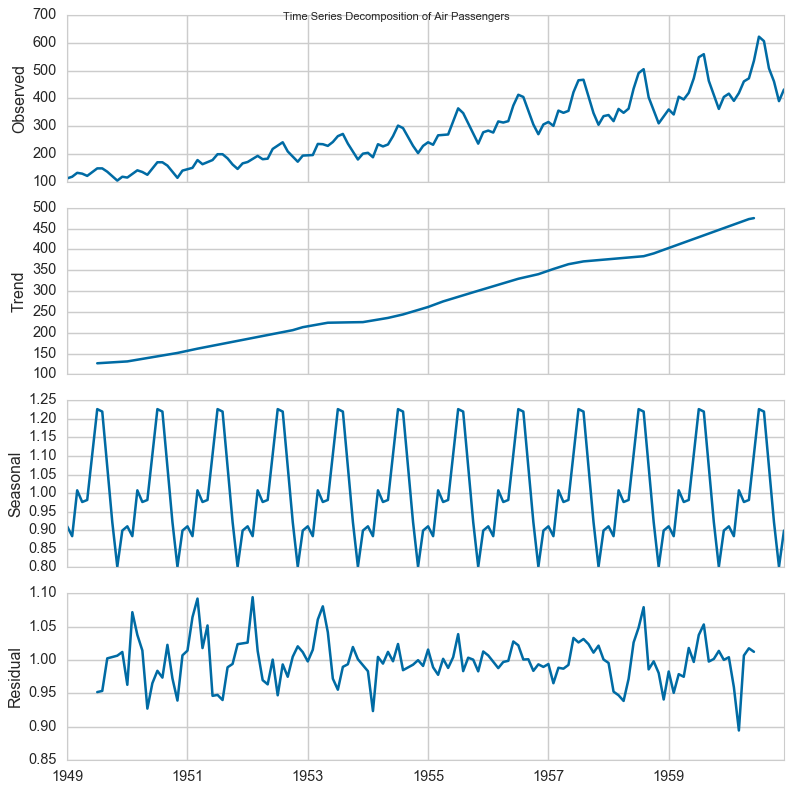

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('data/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# Decompose 
result = seasonal_decompose(df['traffic'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

## Plotting with different scales using secondary Y axis

If you want to show two time series that measures two different quantities at the same point in time, you can plot the second series againt the secondary Y axis on the right.

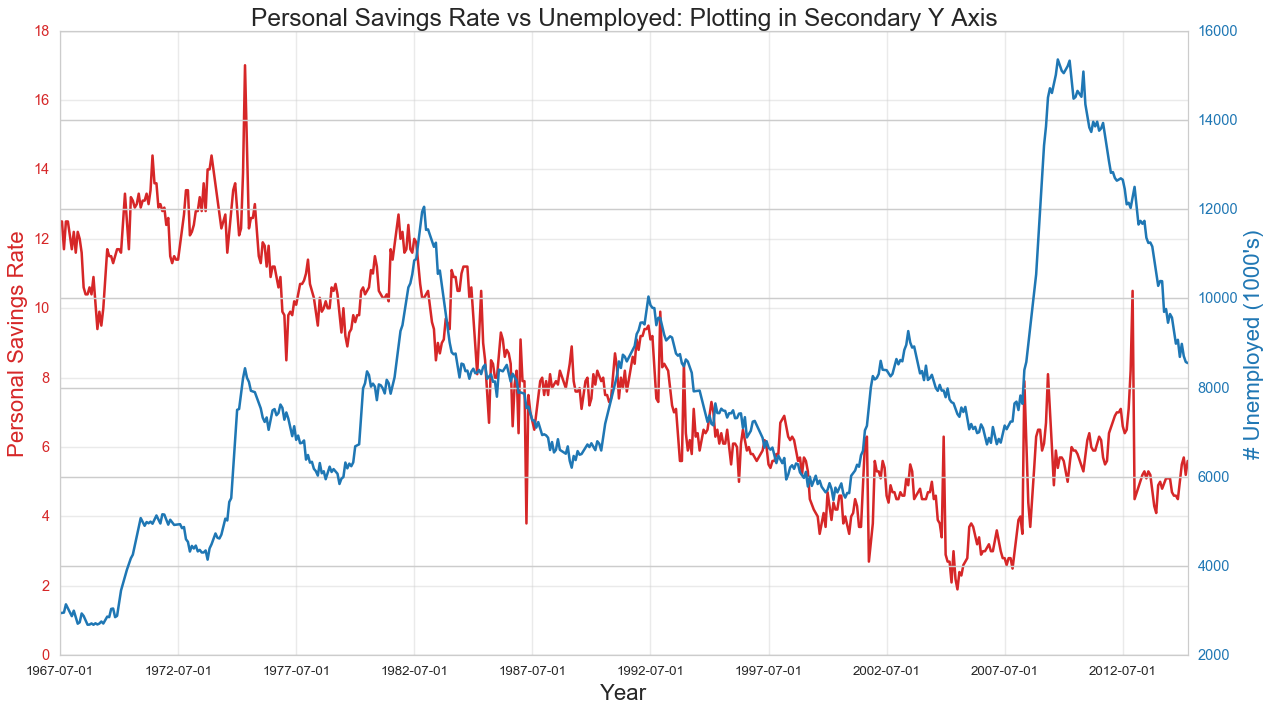

In [113]:
# Import Data
df = pd.read_csv("data/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()

## Time Series with Error Bands
Time series with error bands can be constructed if you have a time series dataset with multiple observations for each time point (date / timestamp). Below you can see a couple of examples based on the orders coming in at various times of the day. And another example on the number of orders arriving over a duration of 45 days.

In this approach, the mean of the number of orders is denoted by the white line. And a 95% confidence bands are computed and drawn around the mean.

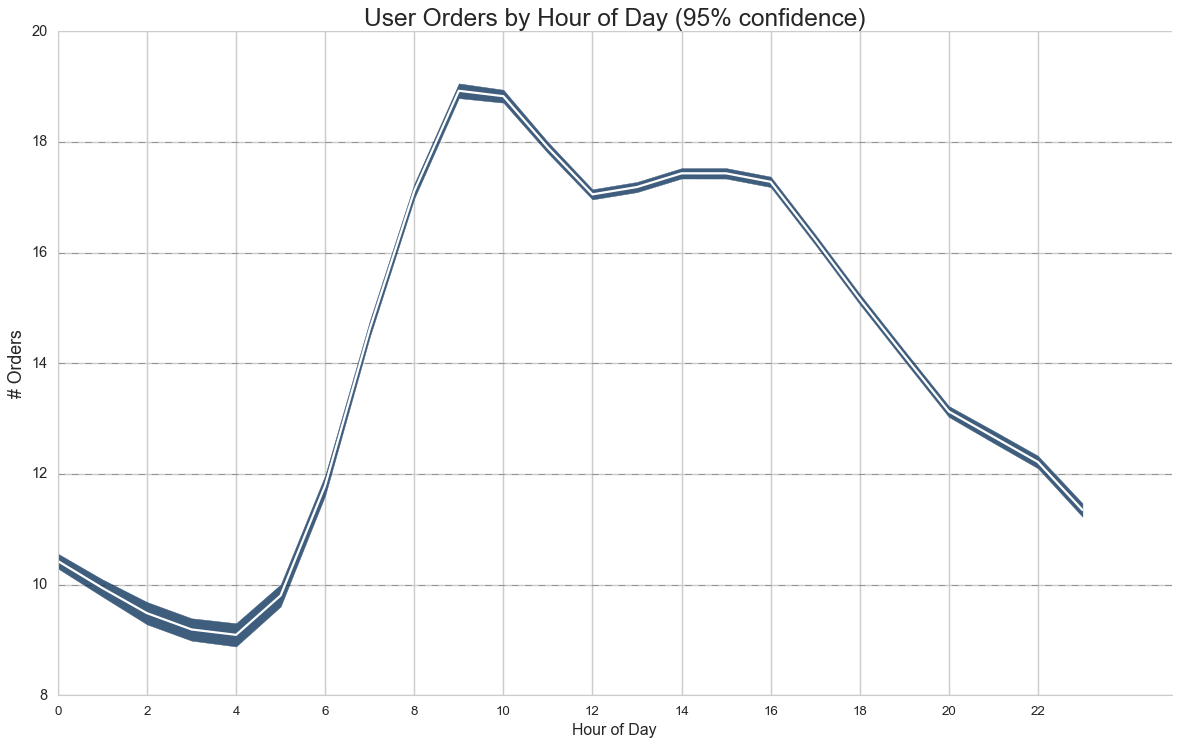

In [114]:
from scipy.stats import sem

# Import Data
df = pd.read_csv("data/user_orders_hourofday.csv")
df_mean = df.groupby('order_hour_of_day').quantity.mean()
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16)  
x = df_mean.index
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("User Orders by Hour of Day (95% confidence)", fontsize=22)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

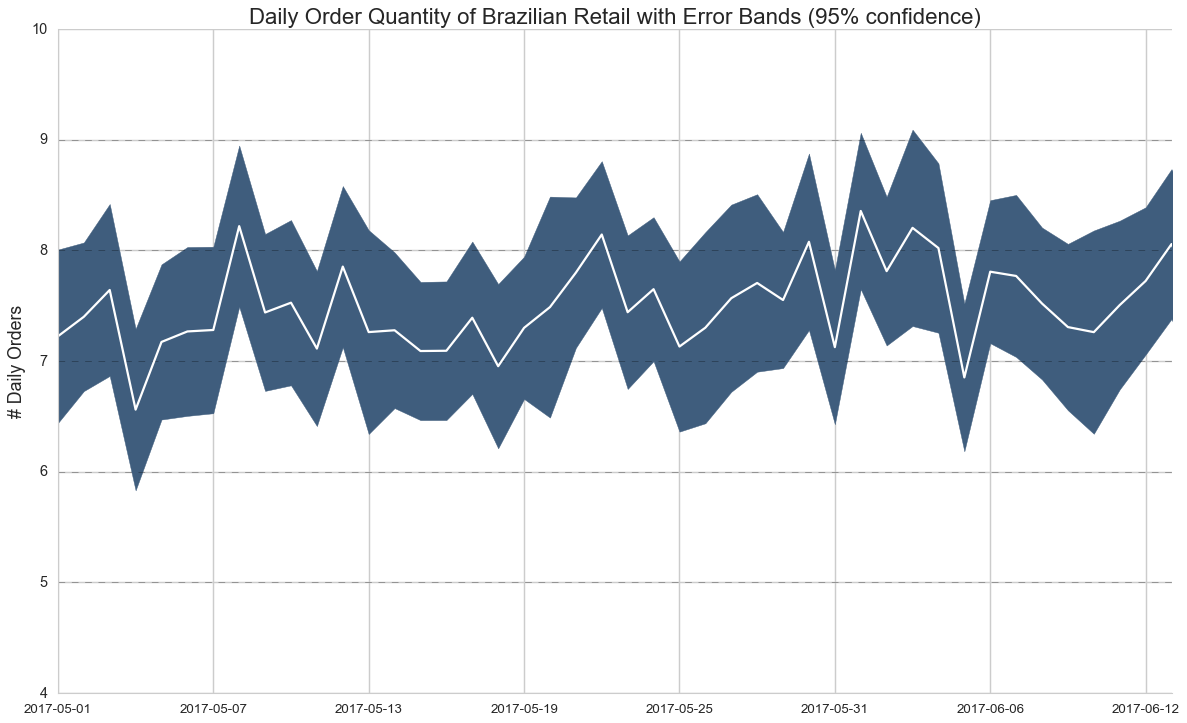

In [115]:
# "Data Source: https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv"
from dateutil.parser import parse
from scipy.stats import sem

# Import Data
df_raw = pd.read_csv('data/orders_45d.csv', 
                     parse_dates=['purchase_time', 'purchase_date'])

# Prepare Data: Daily Mean and SE Bands
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Daily Orders", fontsize=16)  
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]] , fontsize=12)
plt.title("Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)", fontsize=20)

# Axis limits
s, e = plt.gca().get_xlim()
plt.xlim(s, e-2)
plt.ylim(4, 10)

# Draw Horizontal Tick lines  
for y in range(5, 10, 1):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

## Stacked Area Chart

Stacked area chart gives an visual representation of the extent of contribution from multiple time series so that it is easy to compare against each other.

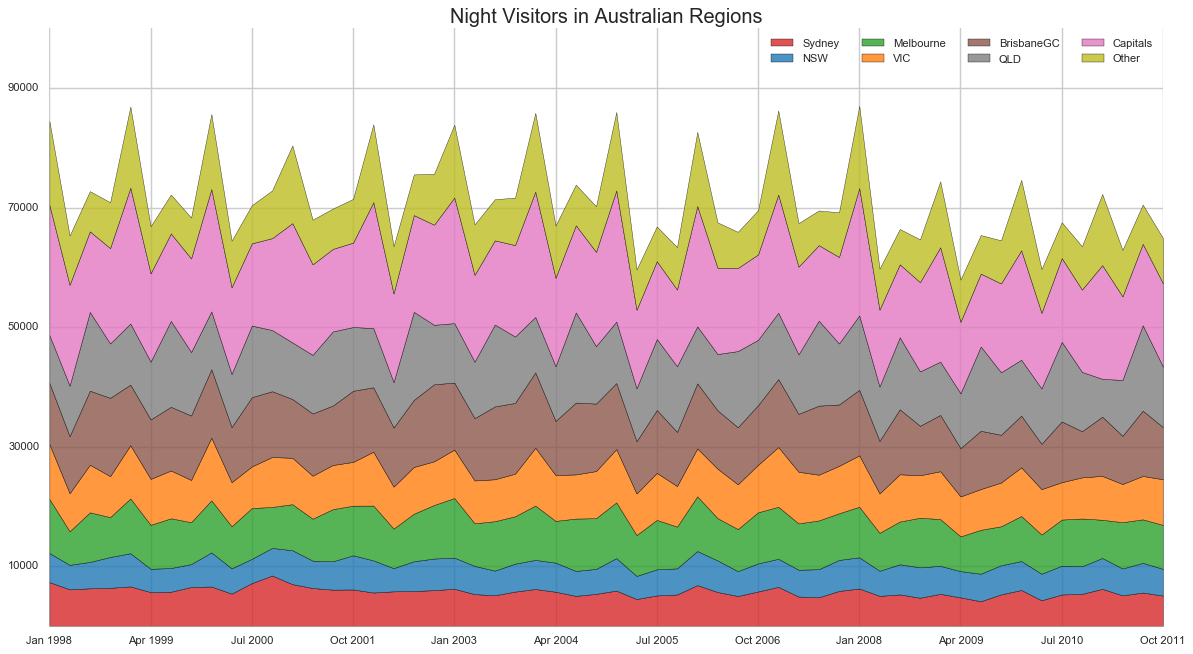

In [116]:
# Import Data
df = pd.read_csv('data/nightvisitors.csv')

# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

## Area Chart UnStacked

An unstacked area chart is used to visualize the progress (ups and downs) of two or more series with respect to each other. In the chart below, you can clearly see how the personal savings rate comes down as the median duration of unemployment increases. The unstacked area chart brings out this phenomenon nicely.

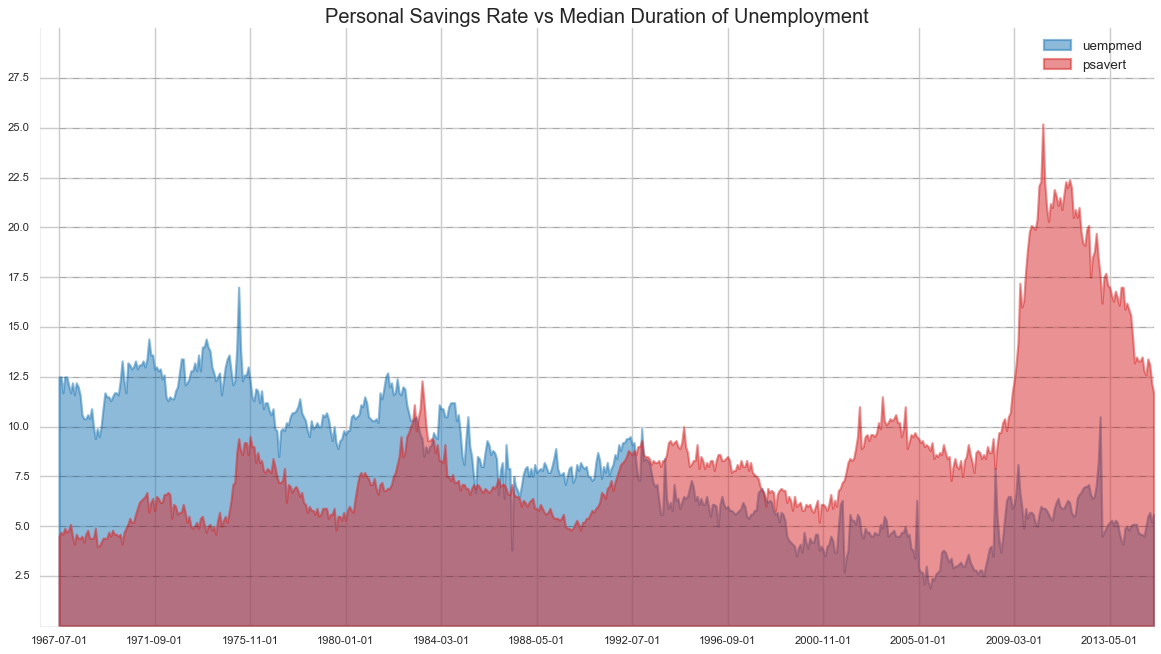

In [117]:
# Import Data
df = pd.read_csv("data/economics.csv")

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

## Calendar Heat Map
Calendar map is an alternate and a less preferred option to visualise time based data compared to a time series. Though can be visually appealing, the numeric values are not quite evident. It is however effective in picturising the extreme values and holiday effects nicely.

/usr/local/lib/python3.7/site-packages/calmap/__init__.py:221: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


(<Figure size 1280x800 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fb64518>],
       dtype=object))

<Figure size 1280x800 with 0 Axes>

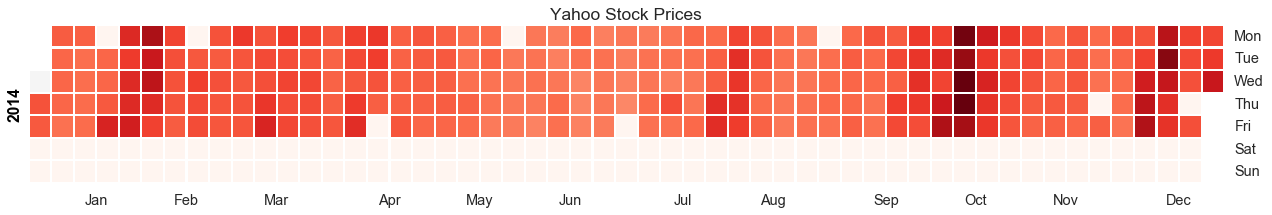

In [118]:
!pip3 install calmap  seaborn 2>&1 1>/dev/null

import matplotlib as mpl
import calmap

# Import Data
df = pd.read_csv("data/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
##plt.show() 

## Seasonal Plot

The seasonal plot can be used to compare how the time series performed at same day in the previous season (year / month / week etc).

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


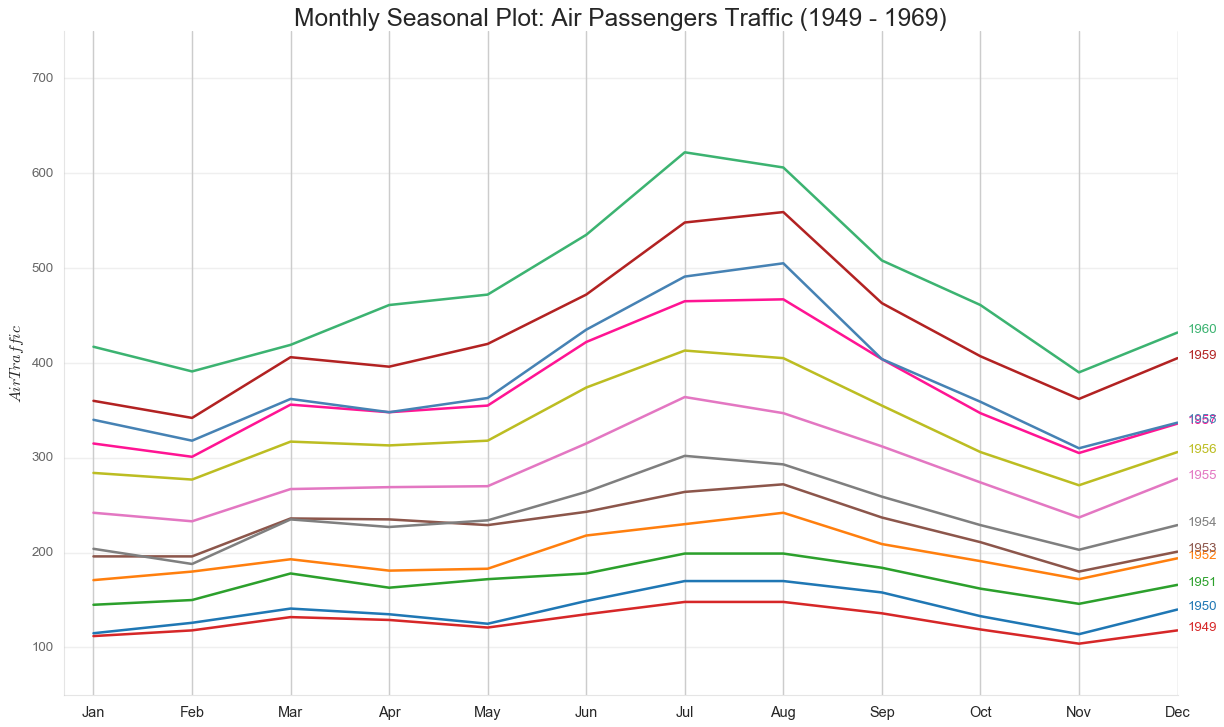

In [119]:
from dateutil.parser import parse 

# Import Data
df = pd.read_csv('data/AirPassengers.csv')

# Prepare data
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(years):
    plt.plot('month', 'traffic', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'traffic'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

# Groups

## Dendrogram

A Dendrogram groups similar points together based on a given distance metric and organizes them in tree like links based on the point’s similarity.



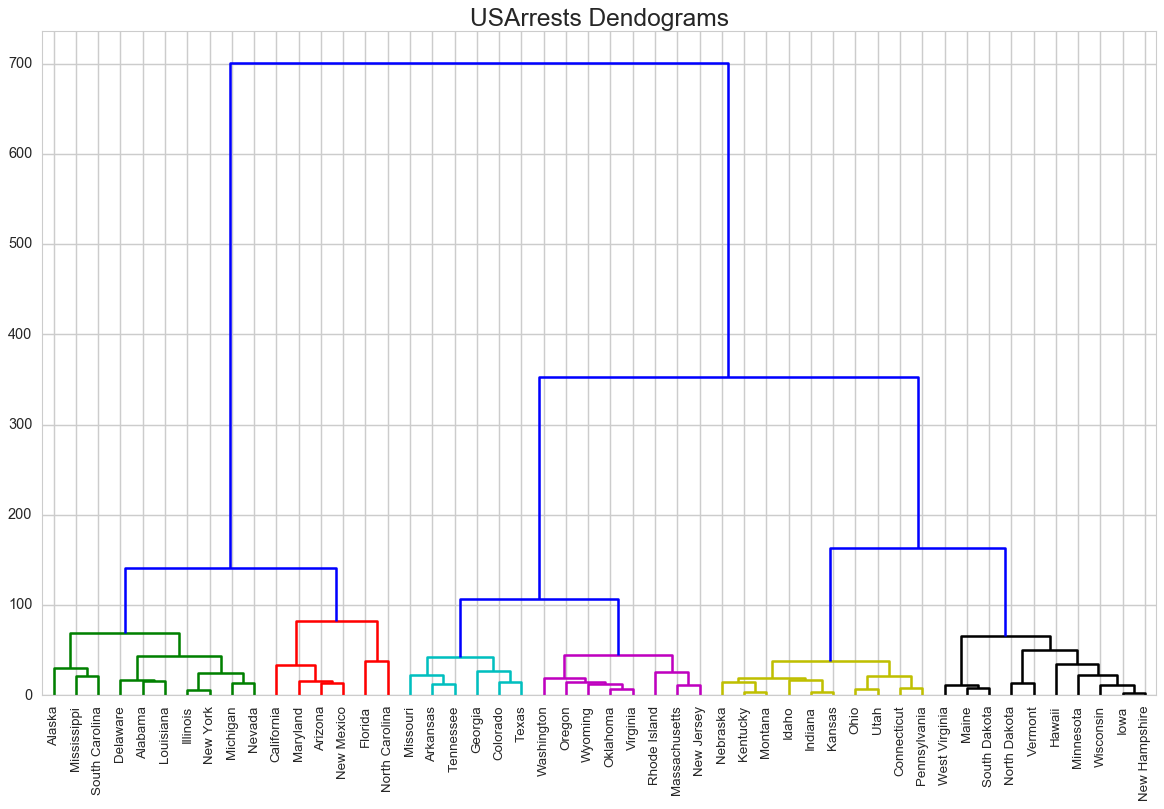

In [120]:
import scipy.cluster.hierarchy as shc

# Import Data
df = pd.read_csv('data/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

## Cluster Plot
Cluster Plot canbe used to demarcate points that belong to the same cluster. Below is a representational example to group the US states into 5 groups based on the USArrests dataset. This cluster plot uses the ‘murder’ and ‘assault’ columns as X and Y axis. Alternately you can use the first to principal components as rthe X and Y a

/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


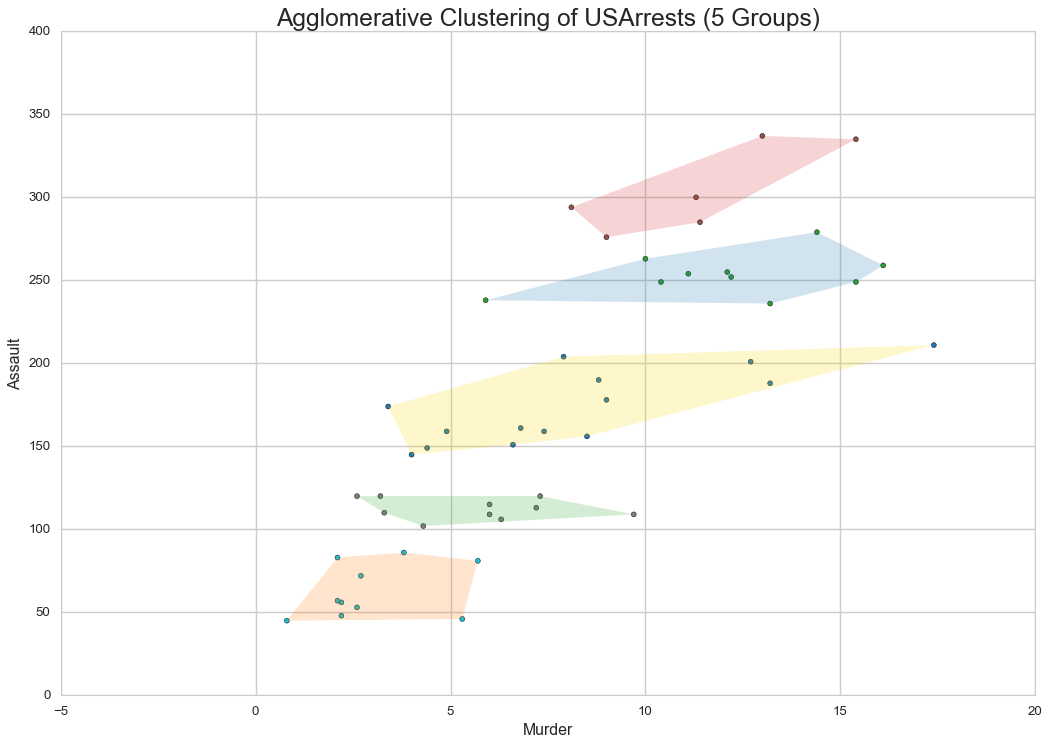

In [121]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('data/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

## Andrews Curve
Andrews Curve helps visualize if there are inherent groupings of the numerical features based on a given grouping. If the features (columns in the dataset) doesn’t help discriminate the group (cyl), then the lines will not be well segregated as you see below.

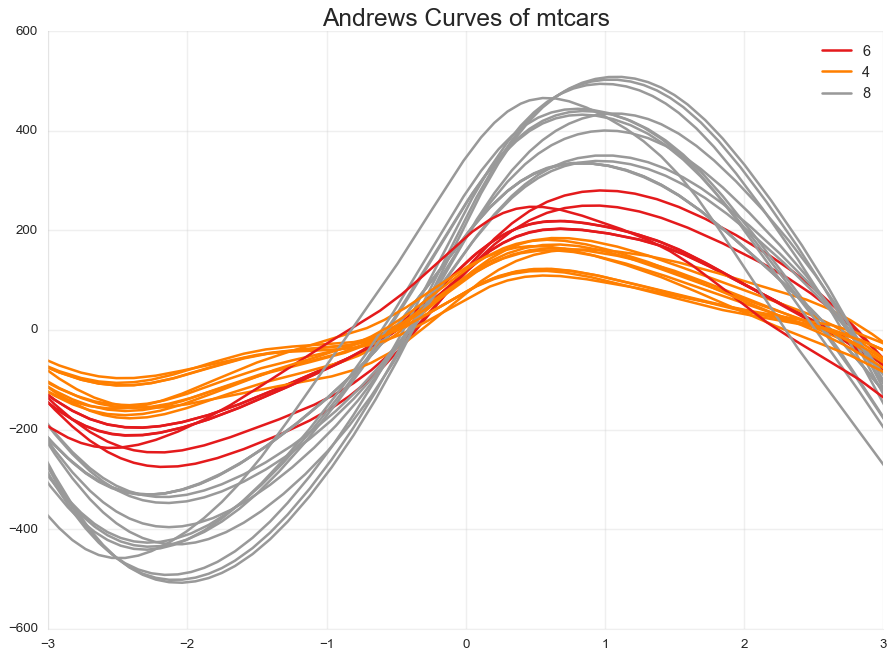

In [122]:
from pandas.plotting import andrews_curves

# Import
df = pd.read_csv("data/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Parallel Coordinates

Parallel coordinates helps to visualize if a feature helps to segregate the groups effectively. If a segregation is effected, that feature is likely going to be very useful in predicting that group.

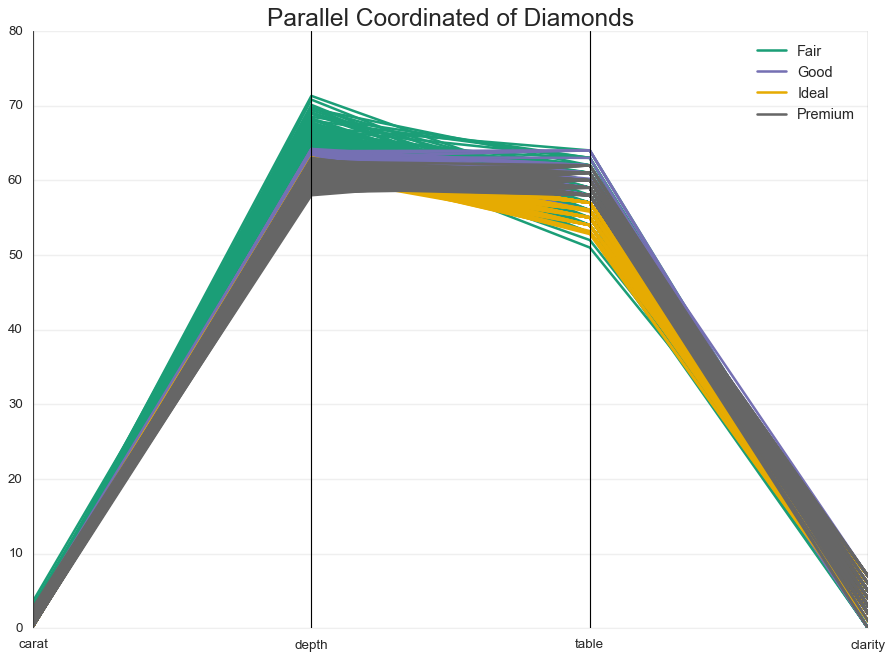

In [123]:
# Import Data
df_final = pd.read_csv("data/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12,9), dpi= 80)
pd.plotting.parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()